In [1]:
# Ïú†Ï†Ñ ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÌôúÏö©Ìïú Î®∏Ïã†Îü¨Îãù ÏûÖÎ†• ÏµúÏ†ÅÌôî Î∞è ÎåÄÏïà Ï†úÏïà Î©îÏÜåÎìú
# Part 4. Ïù∏ÌîåÎ£®Ïñ∏ÏÑú YouTuber ÎêòÍ∏∞ Ïã§Ïäµ
# Fast Campus / (Ï£º)Îç∞Ïù¥ÏõêÏª¥ÌçºÎãà

# **1. Î™®Îìà ÏÑ§Ïπò Î∞è Ìò∏Ï∂ú**

In [2]:
!pip install geneticalgorithm

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 44 kB 906 kB/s 
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15095 sha256=cd7ccfcdd176896cf7fe22fcc163aaeabe9ee1e9e4850ac0247fff204f4e0a35
  Stored in directory: /root/.cache/pip/wheels/68/b5/a5/67c4364c354e141f5a1bd3ec568126f77877ab7554cf5af8cb
Successfully built func-timeout


In [3]:
import copy
import math
import datetime
import itertools
import requests
from io import BytesIO
from random import randint

import chardet
import numpy as np
import pandas as pd
import tqdm
import matplotlib.pyplot as plt
from PIL import Image
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.utils.fixes import loguniform
from xgboost import XGBRegressor
from geneticalgorithm import geneticalgorithm


pd.set_option('display.max_columns', None)

# **2. Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è ÌÉêÏÉâÏ†Å Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù**

In [4]:
# KRvideos.csv Îç∞Ïù¥ÌÑ∞ ÌååÏùºÏùÑ ColabÏóê ÏóÖÎ°úÎìú
# Data link: https://www.kaggle.com/datasnaek/youtube-new
# Ïó¨Îü¨ ÎÇòÎùº data fileÏ§ë ÌïúÍµ≠ Îç∞Ïù¥ÌÑ∞ (KRvideos.csv) ÏÇ¨Ïö©

from google.colab import files, drive
file_uploaded = files.upload()

Saving KRvideos.csv to KRvideos.csv


In [5]:
# ColabÏóê Îç∞Ïù¥ÌÑ∞ ÌååÏùºÏùÑ Ïò¨Î†§ÎÜìÏùÄ Í≤ΩÏö∞
# drive.mount('./content')
! ls /content

KRvideos.csv  sample_data


In [6]:
filename = '/content/KRvideos.csv'

with open(filename, 'rb') as f:
    result = chardet.detect(f.readline())
    print('Encoding type:', result['encoding'])

Encoding type: ascii


In [7]:
raw_data = pd.read_csv(filename, engine='python')
raw_data.head(5)

video_id trending_date                       title channel_title  \
0  RxGQe4EeEpA      17.14.11          Ï¢ãÏïÑ by ÎØºÏÑú_Ïú§Ï¢ÖÏã†_Ï¢ãÎãà ÎãµÍ∞Ä        ÎùºÌë∏ÎßàÏΩîÎ¶¨ÏïÑ   
1  hH7wVE8OlQ0      17.14.11            JSA Í∑ÄÏàú Î∂ÅÌïúÍµ∞ Ï¥ùÍ≤© Î∂ÄÏÉÅ        Edward   
2  9V8bnWUmE9U      17.14.11  ÎÇòÎ™∞ÎùºÌå®Î∞ÄÎ¶¨ Ïö¥ÎèôÌôî ÏòÅÏÉÅ 2ÌÉÑ (ÎπºÎπºÎ°úÎç∞Ïù¥Î≤ÑÏ†º)     ÎÇòÎ™∞ÎùºÌå®Î∞ÄÎ¶¨ Ìï´Ïáº   
3  0_8py-t5R80      17.14.11  ·Ñã·Öµ·ÑÜ·Öß·Üº·Ñá·Ö°·Ü® Ï∂úÍµ≠ ÌòÑÏû•, ÎÜìÏπòÎ©¥ ÏïàÎêòÎäî Ïû•Î©¥         ÎØ∏ÎîîÏñ¥Î™ΩÍµ¨   
4  bk55RbxiQdI      17.14.11     ÍπÄÏû•Í≤∏ÏùÄ Î¨ºÎü¨Í∞îÎã§ MBC ÎÖ∏Ï°∞ ÌôòÌò∏ÏôÄ ÎààÎ¨º        NocutV   

   category_id              publish_time  \
0           22  2017-11-13T07:07:36.000Z   
1           25  2017-11-13T10:59:16.000Z   
2           22  2017-11-11T07:16:08.000Z   
3           25  2017-11-12T11:19:52.000Z   
4           25  2017-11-13T11:08:59.000Z   

                                                tags   views  likes  dislikes  \
0                      ÎùºÌë∏Îßà|"Ïú§Ï¢ÖÏã†"|"Ï¢ãÎãà"|"Ï¢ãÏïÑ"|"ÏÉ¨Î†à"|"ÎØºÏÑú"  156130   1422        40   
1        JSA|"Í∑ÄÏàú"|"Î∂ÅÌïúÍµ∞"|"Ï¥ùÍ≤©"|"Î∂ÄÏÉÅ"|"JSA Í∑ÄÏàú Î∂ÅÌïúÍµ∞ Ï¥ùÍ≤© Î∂ÄÏÉÅ"   76533    211        28   
2                ÏïÑÎîîÎã§Ïä§|"ÎπºÎπºÎ°ú"|"Ìï´Ïáº"|"ÎÇòÎ™∞ÎùºÌå®Î∞ÄÎ¶¨"|"ÎåÄÌïôÎ°ú"|"Í≥µÏó∞"  421409   5112       166   
3  Ïù¥Î™ÖÎ∞ï|"Ïù¥Î™ÖÎ∞ï Ï∂úÍµ≠Í∏àÏßÄ"|"Ïù¥Î™ÖÎ∞ï Ï∂úÍµ≠ÌòÑÏû•"|"Ïù¥Î™ÖÎ∞ï Î∞îÎ†àÏù∏"|"Ïù¥Î™ÖÎ∞ï ÎåÄÌÜµÎ†π"|...  222850   2093       173   
4          nocutV|"ÎÖ∏Ïª∑V"|"CBS"|"mbc"|"ÍπÄÏû•Í≤∏"|"Ìï¥ÏûÑ"|"ÌóàÏùºÌõÑ"   84466   1094       109   

   comment_count                                  thumbnail_link  \
0            272  https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg   
1            113  https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg   
2            459  https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg   
3           1219  https://i.ytimg.com/vi/0_8py-t5R80/default.jpg   
4            450  https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Ïú§Ï¢ÖÏã† 'Ï¢ãÎãà'Ïùò ÎãµÍ∞Ä 'Ï¢ãÏïÑ' ÏµúÏ¥à Í≥µÍ∞ú!\nÍ∑∏ Ïó¨ÏûêÏùò Ïù¥ÏïºÍ∏∞Î•º ÏßÄÍ∏à ÎßåÎÇòÎ≥¥ÏÑ∏Ïöî....  
1  [Ï±ÑÎÑêAÎã®ÎèÖ]Âåó Î≥ëÏÇ¨ ÌòÑÏû¨ 'ÏùòÏãùÎ∂àÎ™Ö'‚Ä¶ ÌòàÏïï Îñ®Ïñ¥ÏßÄÎäî Ï§ë \n[Ï±ÑÎÑêAÎã®ÎèÖ]Ïö∞Î¶¨Ï∏° ...  
2                                    ÌçºÍ∞ÄÏã§Îïå Íº≠ Ï∂úÏ≤ò Î∂ÄÌÉÅÎìúÎ†§Ïöî  
3                                Îã§Ïä§Îäî ÎàÑÍµ¨Í≤ÅÎãàÍπå Îì£Í≥† ÎÇú ÌõÑ ÌëúÏ†ï  
4  ÍπÄÏû•Í≤∏ MBC ÏÇ¨Ïû•Ïù¥ Í≤∞Íµ≠ Ìï¥ÏûÑÎêêÎã§.\n\nMBC ÎåÄÏ£ºÏ£ºÏù∏ Î∞©ÏÜ°Î¨∏ÌôîÏßÑÌù•ÌöåÎäî 13Ïùº ...

In [8]:
# KR_category_id.jsonÏóêÏÑú Í∞ÄÏ†∏Ïò¥
category_id_code = {'1': 'Film & Animation',
                    '2': 'Autos & Vehicles',
                    '10': 'Music',
                    '15': 'Pets & Animals',
                    '17': 'Sports',
                    '18': 'Short Movies',
                    '19': 'Travel & Events',
                    '20': 'Gaming',
                    '21': 'Videoblogging',
                    '22': 'People & Blogs',
                    '23': 'Comedy',
                    '24': 'Entertainment',
                    '25': 'News & Politics',
                    '26': 'Howto & Style',
                    '27': 'Education',
                    '28': 'Science & Technology',
                    '29': 'Nonprofits & Activism',
                    '30': 'Movies',
                    '31': 'Anime/Animation',
                    '32': 'Action/Adventure',
                    '33': 'Classics',
                    '34': 'Comedy',
                    '35': 'Documentary',
                    '36': 'Drama',
                    '37': 'Family',
                    '38': 'Foreign',                    
                    '39': 'Horror',
                    '40': 'Sci-Fi/Fantasy',
                    '41': 'Thriller',
                    '42': 'Shorts',
                    '43': 'Shows',
                    '44': 'Trailers'}

In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34567 entries, 0 to 34566
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                34567 non-null  object
 1   trending_date           34567 non-null  object
 2   title                   34567 non-null  object
 3   channel_title           34567 non-null  object
 4   category_id             34567 non-null  int64 
 5   publish_time            34567 non-null  object
 6   tags                    34567 non-null  object
 7   views                   34567 non-null  int64 
 8   likes                   34567 non-null  int64 
 9   dislikes                34567 non-null  int64 
 10  comment_count           34567 non-null  int64 
 11  thumbnail_link          34567 non-null  object
 12  comments_disabled       34567 non-null  bool  
 13  ratings_disabled        34567 non-null  bool  
 14  video_error_or_removed  34567 non-null  bool  
 15  de

In [10]:
raw_data['description'].isnull().sum()

3163

In [11]:
raw_data['comments_disabled'][raw_data['comments_disabled'] == True].sum()

511

In [12]:
raw_data['ratings_disabled'][raw_data['ratings_disabled'] == True].sum()

1400

In [13]:
raw_data['video_error_or_removed'][raw_data['video_error_or_removed'] == True].sum()

41

In [14]:
for i in list(raw_data):
    print(i)
    print(raw_data[i].duplicated().value_counts())
    print('\n')

video_id
True     18691
False    15876
Name: video_id, dtype: int64


trending_date
True     34362
False      205
Name: trending_date, dtype: int64


title
True     18214
False    16353
Name: title, dtype: int64


channel_title
True     30524
False     4043
Name: channel_title, dtype: int64


category_id
True     34550
False       17
Name: category_id, dtype: int64


publish_time
True     18705
False    15862
Name: publish_time, dtype: int64


tags
True     23776
False    10791
Name: tags, dtype: int64


views
False    30690
True      3877
Name: views, dtype: int64


likes
True     25093
False     9474
Name: likes, dtype: int64


dislikes
True     32492
False     2075
Name: dislikes, dtype: int64


comment_count
True     29878
False     4689
Name: comment_count, dtype: int64


thumbnail_link
True     18478
False    16089
Name: thumbnail_link, dtype: int64


comments_disabled
True     34565
False        2
Name: comments_disabled, dtype: int64


ratings_disabled
True     34565
False     

In [15]:
df = raw_data[raw_data['comments_disabled'] != 1]
df = df[df['ratings_disabled'] != 1]
df = df[df['video_error_or_removed'] != 1]
df = df[df['tags'] != '[none]']
df.head(5)

video_id trending_date                       title channel_title  \
0  RxGQe4EeEpA      17.14.11          Ï¢ãÏïÑ by ÎØºÏÑú_Ïú§Ï¢ÖÏã†_Ï¢ãÎãà ÎãµÍ∞Ä        ÎùºÌë∏ÎßàÏΩîÎ¶¨ÏïÑ   
1  hH7wVE8OlQ0      17.14.11            JSA Í∑ÄÏàú Î∂ÅÌïúÍµ∞ Ï¥ùÍ≤© Î∂ÄÏÉÅ        Edward   
2  9V8bnWUmE9U      17.14.11  ÎÇòÎ™∞ÎùºÌå®Î∞ÄÎ¶¨ Ïö¥ÎèôÌôî ÏòÅÏÉÅ 2ÌÉÑ (ÎπºÎπºÎ°úÎç∞Ïù¥Î≤ÑÏ†º)     ÎÇòÎ™∞ÎùºÌå®Î∞ÄÎ¶¨ Ìï´Ïáº   
3  0_8py-t5R80      17.14.11  ·Ñã·Öµ·ÑÜ·Öß·Üº·Ñá·Ö°·Ü® Ï∂úÍµ≠ ÌòÑÏû•, ÎÜìÏπòÎ©¥ ÏïàÎêòÎäî Ïû•Î©¥         ÎØ∏ÎîîÏñ¥Î™ΩÍµ¨   
4  bk55RbxiQdI      17.14.11     ÍπÄÏû•Í≤∏ÏùÄ Î¨ºÎü¨Í∞îÎã§ MBC ÎÖ∏Ï°∞ ÌôòÌò∏ÏôÄ ÎààÎ¨º        NocutV   

   category_id              publish_time  \
0           22  2017-11-13T07:07:36.000Z   
1           25  2017-11-13T10:59:16.000Z   
2           22  2017-11-11T07:16:08.000Z   
3           25  2017-11-12T11:19:52.000Z   
4           25  2017-11-13T11:08:59.000Z   

                                                tags   views  likes  dislikes  \
0                      ÎùºÌë∏Îßà|"Ïú§Ï¢ÖÏã†"|"Ï¢ãÎãà"|"Ï¢ãÏïÑ"|"ÏÉ¨Î†à"|"ÎØºÏÑú"  156130   1422        40   
1        JSA|"Í∑ÄÏàú"|"Î∂ÅÌïúÍµ∞"|"Ï¥ùÍ≤©"|"Î∂ÄÏÉÅ"|"JSA Í∑ÄÏàú Î∂ÅÌïúÍµ∞ Ï¥ùÍ≤© Î∂ÄÏÉÅ"   76533    211        28   
2                ÏïÑÎîîÎã§Ïä§|"ÎπºÎπºÎ°ú"|"Ìï´Ïáº"|"ÎÇòÎ™∞ÎùºÌå®Î∞ÄÎ¶¨"|"ÎåÄÌïôÎ°ú"|"Í≥µÏó∞"  421409   5112       166   
3  Ïù¥Î™ÖÎ∞ï|"Ïù¥Î™ÖÎ∞ï Ï∂úÍµ≠Í∏àÏßÄ"|"Ïù¥Î™ÖÎ∞ï Ï∂úÍµ≠ÌòÑÏû•"|"Ïù¥Î™ÖÎ∞ï Î∞îÎ†àÏù∏"|"Ïù¥Î™ÖÎ∞ï ÎåÄÌÜµÎ†π"|...  222850   2093       173   
4          nocutV|"ÎÖ∏Ïª∑V"|"CBS"|"mbc"|"ÍπÄÏû•Í≤∏"|"Ìï¥ÏûÑ"|"ÌóàÏùºÌõÑ"   84466   1094       109   

   comment_count                                  thumbnail_link  \
0            272  https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg   
1            113  https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg   
2            459  https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg   
3           1219  https://i.ytimg.com/vi/0_8py-t5R80/default.jpg   
4            450  https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Ïú§Ï¢ÖÏã† 'Ï¢ãÎãà'Ïùò ÎãµÍ∞Ä 'Ï¢ãÏïÑ' ÏµúÏ¥à Í≥µÍ∞ú!\nÍ∑∏ Ïó¨ÏûêÏùò Ïù¥ÏïºÍ∏∞Î•º ÏßÄÍ∏à ÎßåÎÇòÎ≥¥ÏÑ∏Ïöî....  
1  [Ï±ÑÎÑêAÎã®ÎèÖ]Âåó Î≥ëÏÇ¨ ÌòÑÏû¨ 'ÏùòÏãùÎ∂àÎ™Ö'‚Ä¶ ÌòàÏïï Îñ®Ïñ¥ÏßÄÎäî Ï§ë \n[Ï±ÑÎÑêAÎã®ÎèÖ]Ïö∞Î¶¨Ï∏° ...  
2                                    ÌçºÍ∞ÄÏã§Îïå Íº≠ Ï∂úÏ≤ò Î∂ÄÌÉÅÎìúÎ†§Ïöî  
3                                Îã§Ïä§Îäî ÎàÑÍµ¨Í≤ÅÎãàÍπå Îì£Í≥† ÎÇú ÌõÑ ÌëúÏ†ï  
4  ÍπÄÏû•Í≤∏ MBC ÏÇ¨Ïû•Ïù¥ Í≤∞Íµ≠ Ìï¥ÏûÑÎêêÎã§.\n\nMBC ÎåÄÏ£ºÏ£ºÏù∏ Î∞©ÏÜ°Î¨∏ÌôîÏßÑÌù•ÌöåÎäî 13Ïùº ...

In [16]:
print('Before dropna:', len(df))
df = df.dropna()
print('After  dropna:', len(df))
df = df.reset_index(drop=True)

Before dropna: 26078
After  dropna: 24768


#**3. ÌîºÏ≥ê ÏóîÏßÄÎãàÏñ¥ÎßÅ**

In [17]:
r_avg = []
g_avg = []
b_avg = []

for i in tqdm.tqdm(range(len(df))):
    url = df['thumbnail_link'][i]
    res = requests.get(url)
    request_get_img = Image.open(BytesIO(res.content))
    red, green, blue = request_get_img.split()

    r_avg.append(int(np.average(red)))
    g_avg.append(int(np.average(green)))
    b_avg.append(int(np.average(blue)))

df['r_avg'] = r_avg
df['g_avg'] = g_avg
df['b_avg'] = b_avg

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24768/24768 [07:51<00:00, 52.49it/s]


In [18]:
df.head(5)

video_id trending_date                       title channel_title  \
0  RxGQe4EeEpA      17.14.11          Ï¢ãÏïÑ by ÎØºÏÑú_Ïú§Ï¢ÖÏã†_Ï¢ãÎãà ÎãµÍ∞Ä        ÎùºÌë∏ÎßàÏΩîÎ¶¨ÏïÑ   
1  hH7wVE8OlQ0      17.14.11            JSA Í∑ÄÏàú Î∂ÅÌïúÍµ∞ Ï¥ùÍ≤© Î∂ÄÏÉÅ        Edward   
2  9V8bnWUmE9U      17.14.11  ÎÇòÎ™∞ÎùºÌå®Î∞ÄÎ¶¨ Ïö¥ÎèôÌôî ÏòÅÏÉÅ 2ÌÉÑ (ÎπºÎπºÎ°úÎç∞Ïù¥Î≤ÑÏ†º)     ÎÇòÎ™∞ÎùºÌå®Î∞ÄÎ¶¨ Ìï´Ïáº   
3  0_8py-t5R80      17.14.11  ·Ñã·Öµ·ÑÜ·Öß·Üº·Ñá·Ö°·Ü® Ï∂úÍµ≠ ÌòÑÏû•, ÎÜìÏπòÎ©¥ ÏïàÎêòÎäî Ïû•Î©¥         ÎØ∏ÎîîÏñ¥Î™ΩÍµ¨   
4  bk55RbxiQdI      17.14.11     ÍπÄÏû•Í≤∏ÏùÄ Î¨ºÎü¨Í∞îÎã§ MBC ÎÖ∏Ï°∞ ÌôòÌò∏ÏôÄ ÎààÎ¨º        NocutV   

   category_id              publish_time  \
0           22  2017-11-13T07:07:36.000Z   
1           25  2017-11-13T10:59:16.000Z   
2           22  2017-11-11T07:16:08.000Z   
3           25  2017-11-12T11:19:52.000Z   
4           25  2017-11-13T11:08:59.000Z   

                                                tags   views  likes  dislikes  \
0                      ÎùºÌë∏Îßà|"Ïú§Ï¢ÖÏã†"|"Ï¢ãÎãà"|"Ï¢ãÏïÑ"|"ÏÉ¨Î†à"|"ÎØºÏÑú"  156130   1422        40   
1        JSA|"Í∑ÄÏàú"|"Î∂ÅÌïúÍµ∞"|"Ï¥ùÍ≤©"|"Î∂ÄÏÉÅ"|"JSA Í∑ÄÏàú Î∂ÅÌïúÍµ∞ Ï¥ùÍ≤© Î∂ÄÏÉÅ"   76533    211        28   
2                ÏïÑÎîîÎã§Ïä§|"ÎπºÎπºÎ°ú"|"Ìï´Ïáº"|"ÎÇòÎ™∞ÎùºÌå®Î∞ÄÎ¶¨"|"ÎåÄÌïôÎ°ú"|"Í≥µÏó∞"  421409   5112       166   
3  Ïù¥Î™ÖÎ∞ï|"Ïù¥Î™ÖÎ∞ï Ï∂úÍµ≠Í∏àÏßÄ"|"Ïù¥Î™ÖÎ∞ï Ï∂úÍµ≠ÌòÑÏû•"|"Ïù¥Î™ÖÎ∞ï Î∞îÎ†àÏù∏"|"Ïù¥Î™ÖÎ∞ï ÎåÄÌÜµÎ†π"|...  222850   2093       173   
4          nocutV|"ÎÖ∏Ïª∑V"|"CBS"|"mbc"|"ÍπÄÏû•Í≤∏"|"Ìï¥ÏûÑ"|"ÌóàÏùºÌõÑ"   84466   1094       109   

   comment_count                                  thumbnail_link  \
0            272  https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg   
1            113  https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg   
2            459  https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg   
3           1219  https://i.ytimg.com/vi/0_8py-t5R80/default.jpg   
4            450  https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  r_avg  g_avg  b_avg  
0  Ïú§Ï¢ÖÏã† 'Ï¢ãÎãà'Ïùò ÎãµÍ∞Ä 'Ï¢ãÏïÑ' ÏµúÏ¥à Í≥µÍ∞ú!\nÍ∑∏ Ïó¨ÏûêÏùò Ïù¥ÏïºÍ∏∞Î•º ÏßÄÍ∏à ÎßåÎÇòÎ≥¥ÏÑ∏Ïöî....     56     41     31  
1  [Ï±ÑÎÑêAÎã®ÎèÖ]Âåó Î≥ëÏÇ¨ ÌòÑÏû¨ 'ÏùòÏãùÎ∂àÎ™Ö'‚Ä¶ ÌòàÏïï Îñ®Ïñ¥ÏßÄÎäî Ï§ë \n[Ï±ÑÎÑêAÎã®ÎèÖ]Ïö∞Î¶¨Ï∏° ...    193    193    193  
2                                    ÌçºÍ∞ÄÏã§Îïå Íº≠ Ï∂úÏ≤ò Î∂ÄÌÉÅÎìúÎ†§Ïöî    105     84     86  
3                                Îã§Ïä§Îäî ÎàÑÍµ¨Í≤ÅÎãàÍπå Îì£Í≥† ÎÇú ÌõÑ ÌëúÏ†ï     89     86     86  
4  ÍπÄÏû•Í≤∏ MBC ÏÇ¨Ïû•Ïù¥ Í≤∞Íµ≠ Ìï¥ÏûÑÎêêÎã§.\n\nMBC ÎåÄÏ£ºÏ£ºÏù∏ Î∞©ÏÜ°Î¨∏ÌôîÏßÑÌù•ÌöåÎäî 13Ïùº ...     81     77     61

In [19]:
check_table = df[df['r_avg'] == df['g_avg']]
check_table = check_table[check_table['g_avg'] == check_table['b_avg']]
print('len_check_table:', len(check_table))

print('Before removing non-thumbnail images:', len(df))
df_rgb = df[df['r_avg'] != 193]
print('After  removing non-thumbnail images:', len(df_rgb))
df_rgb = df_rgb.reset_index(drop=True)
df_rgb.to_csv('df_color_encode.csv', index_label=False)

len_check_table: 9690
Before removing non-thumbnail images: 24768
After  removing non-thumbnail images: 15194


In [20]:
# df_rgb = pd.read_csv('df_color_encode.csv')
print(df['video_id'].duplicated().value_counts())
df_rgb[df_rgb.duplicated('video_id')].sort_values(by='video_id')

True     13672
False    11096
Name: video_id, dtype: int64


video_id trending_date  \
13343       #NAME?      18.26.05   
14845       #NAME?      18.11.06   
6736        #NAME?      18.20.02   
13411       #NAME?      18.26.05   
11563       #NAME?      18.05.05   
...            ...           ...   
7834   zxjJLN12Ig0      18.09.03   
7640   zxpH0ekLUHI      18.06.03   
7712   zxpH0ekLUHI      18.07.03   
11551  zy9W8V1ICOw      18.05.05   
11077  zyz3rnlxOvM      18.29.04   

                                                   title     channel_title  \
13343  Î∞©ÌÉÑÏÜåÎÖÑÎã® - ANPANMAN (BTS - ANPANMAN) ‚îÇBTS COMEBAC...             RT TV   
14845  [2018 KBO Ï†ïÍ∑úÏãúÏ¶å] Ïù¥Î†áÍ≤å Î©ãÏßÑ ÏÑ∏Î¶¨Î®∏Îãà Î≥¥Ïã† Ï†Å ÏûàÏúºÏã≠ÎãàÍπå ÎëêÏÇ∞ Î≤†Ïñ¥Ïä§Ïùò...   BearSpotvÎ≤†Ïñ¥Ïä§Ìè¨Ìã∞ÎπÑ   
6736   ÌåÄÏ∂îÏõî Ïó¨Ïûê ÎèôÎ£åÏï†Îäî Ïñ¥ÎîîÎ°ú ÏÇ¨ÎùºÏ°åÎÇò.. ÎÖ∏ÏÑ†ÏòÅ ÍπÄÎ≥¥Î¶Ñ Î∞ïÏßÄÏö∞ ÏïàÌÉÄÍπåÏö¥ Í≤ΩÍ∏∞ (ÌíÄÏòÅ...            SBS Îâ¥Ïä§   
13411  Î∞©ÌÉÑÏÜåÎÖÑÎã® - ANPANMAN (BTS - ANPANMAN) ‚îÇBTS COMEBAC...             RT TV   
11563                     ÏÑúÎ°úÏùò Í∞ÑÏãùÏùÑ ÌÉêÎÇ¥Îäî Í∞ïÏïÑÏßÄÎì§ üê∂ Í∑∏Îßå Ï¢Ä Ïã∏Ïõå~ „Ö†„Ö†  ÏÜåÎÖÄÏùòÌñâÏÑ±GirlsPlanet   
...                                                  ...               ...   
7834   [Î¶¨Ìîå] Îã¨Îã¨Ìïú Î®∏Îû≠Ïø†ÌÇ§ Îß®ÏÜêÏúºÎ°ú ÏßÅÏ†ë ÎßåÎì§Ïñ¥Î≥¥ÏïòÎã§! Ïù¥Î≤àÏóêÎäî Ïñ¥ÎñªÍ≤å ÎßùÌï†Íπå? | ...          Ripple_S   
7640   [MV] Hyungdon & Daejune(ÌòïÎèàÏù¥ÏôÄ ÎåÄÏ§ÄÏù¥) _ The King o...      1theK (ÏõêÎçîÏºÄÏù¥)   
7712   [MV] Hyungdon & Daejune(ÌòïÎèàÏù¥ÏôÄ ÎåÄÏ§ÄÏù¥) _ The King o...      1theK (ÏõêÎçîÏºÄÏù¥)   
11551              „ÄêÍΩÉÌïÄ„Äë ÏûêÏÉÅÎ¨¥ÏÉâ ÌïúÍµ≠Ïñ¥ Ïª§Î≤Ñ (Ëá™ÂÇ∑ÁÑ°Ëâ≤  korean cover)                ÍΩÉÌïÄ   
11077                       ÏπúÍµ¨ÌïúÌÖå Ïç®Î®πÍ∏∞ Ï¢ãÏùÄ ÎßàÏà† Î™∞Ïπ¥„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã            ÏïÖÏñ¥ÏùòÏÇ¨ÏÉùÌôú   

       category_id              publish_time  \
13343           22  2018-05-25T09:20:17.000Z   
14845           17  2018-06-10T11:31:47.000Z   
6736            25  2018-02-19T11:54:58.000Z   
13411           22  2018-05-25T09:20:17.000Z   
11563           15  2018-05-03T09:25:20.000Z   
...            ...                       ...   
7834            23  2018-03-07T10:30:02.000Z   
7640            10  2018-03-04T09:00:03.000Z   
7712            10  2018-03-04T09:00:03.000Z   
11551           10  2018-05-03T05:38:40.000Z   
11077           22  2018-04-27T09:30:01.000Z   

                                                    tags   views  likes  \
13343  bts anpanman reaction|"bts anpanman comeback s...  221175   8496   
14845  spotv|"Ïä§Ìè¨Ìã∞ÎπÑ"|"bearspotv"|"Î≤†Ïñ¥Ïä§Ìè¨Ìã∞ÎπÑ"|"Î≤†Ïñ¥Ïä§TV"|"ÎëêÏÇ∞"...   36249   1023   
6736   Îâ¥Ïä§|"NEWS"|"news"|"SBS"|"sbs"|"SBS NEWS"|"SBS8N...  300509    399   
13411  bts anpanman reaction|"bts anpanman comeback s...  221175   8496   
11563  Í∞ïÏïÑÏßÄ|"ÏÜåÎÖÄ"|"ÎåïÎåïÏù¥"|"Ïï†ÏôÑÎèôÎ¨º"|"ÎèôÎ¨º"|"Í≥®Îì†Î¶¨Ìä∏Î¶¨Î≤Ñ"|"ÎûòÎ∏åÎùºÎèÑÎ¶¨Ìä∏Î¶¨Î≤Ñ"...  206222   5245   
...                                                  ...     ...    ...   
7834   Ripple|"Ripple_S"|"Replay"|"Î¶¨ÌîåÏ¶à"|"Î¶¨ÌîåÏóêÏä§"|"Î¶¨ÌîåÎ†àÏù¥"...  250100   3592   
7640   Kpop|"1theK"|"ÏõêÎçîÏºÄÏù¥"|"loen"|"Î°úÏóî"|"ÎÆ§ÎπÑ"|"Ìã∞Ï†∏"|"MV"...  175110   7640   
7712   Kpop|"1theK"|"ÏõêÎçîÏºÄÏù¥"|"loen"|"Î°úÏóî"|"ÎÆ§ÎπÑ"|"Ìã∞Ï†∏"|"MV"...  224813   8662   
11551  ÍΩÉÌïÄ|"ÏÉåÎìúÎ∞ïÏä§"|"Jishou mushoku"|"ÏûêÏÉÅÎ¨¥ÏÉâ"|"Ëá™ÂÇ∑ÁÑ°Ëâ≤"|"ÎÑ§ÏΩîÎ≥¥Î°ú...   67169   3751   
11077  Ìä∏Î†àÏ†∏ÌóåÌÑ∞|"Îä™ÏßÄÎåÄ"|"ÎßàÏù∏ÌÅ¨ÎûòÌîÑÌä∏"|"minecraft"|"Í≤åÏûÑ"|"game"|"...  142454   2802   

       dislikes  comment_count  \
13343        84            331   
14845        10            198   
6736        699           1356   
13411        84            331   
11563        51           1022   
...         ...            ...   
7834         54            713   
7640        152            873   
7712        165           1019   
11551        50            815   
11077        51            255   

                                       thumbnail_link  comments_disabled  \
13343  https://i.ytimg.com/vi/-qFrHv2XbB

In [21]:
df_rgb[df_rgb['video_id']=='#NAME?']

video_id trending_date  \
34      #NAME?      17.14.11   
118     #NAME?      17.15.11   
159     #NAME?      17.15.11   
160     #NAME?      17.15.11   
208     #NAME?      17.16.11   
...        ...           ...   
14963   #NAME?      18.12.06   
15024   #NAME?      18.13.06   
15104   #NAME?      18.13.06   
15139   #NAME?      18.14.06   
15170   #NAME?      18.14.06   

                                                   title  \
34                                     [ÏòÅÌôîÍ±∏ÏûëÏÑ†] 37Ìöå - Ïû•ÏÇ∞Î≤î   
118                                     JSA Í∑ÄÏàú Î∂ÅÌïúÍµ∞ Ï¥ùÍ≤© Î∂ÄÏÉÅ   
159                                    [ÏòÅÌôîÍ±∏ÏûëÏÑ†] 37Ìöå - Ïû•ÏÇ∞Î≤î   
160    Sau √Ånh H√†o Quang #7 FULL | C√°t Ph∆∞·ª£ng: C√°i sa...   
208    171115 AAA Î†àÎìúÏπ¥Ìé´ ÏõåÎÑàÏõê Í∞ïÎã§ÎãàÏóò Ìè¨Ïª§Ïä§ 4K ÏßÅÏ∫† / WANNAONE ...   
...                                                  ...   
14963  BTS RM, SUGA, J-HOPE - DDAENG (Îï°) (DISS) REACT...   
15024  ÎØ∏Ïö∞ÏÉà ÏûÖÏÇ¥Î¶º ÎÅùÌåêÏôï ÏñëÏÑ∏Ìòï Î†àÏ†ÑÎìú Î™®Ïùå 2Ìé∏!! „ÄäÎ™®ÏïòÏ∫êÏπò / ÎØ∏Ïö¥Ïö∞Î¶¨ÏÉàÎÅº / Ïä§...   
15104  ÎØ∏Ïö∞ÏÉà ÏûÖÏÇ¥Î¶º ÎÅùÌåêÏôï ÏñëÏÑ∏Ìòï Î†àÏ†ÑÎìú Î™®Ïùå 2Ìé∏!! „ÄäÎ™®ÏïòÏ∫êÏπò / ÎØ∏Ïö¥Ïö∞Î¶¨ÏÉàÎÅº / Ïä§...   
15139  ÎØ∏Ïö∞ÏÉà ÏûÖÏÇ¥Î¶º ÎÅùÌåêÏôï ÏñëÏÑ∏Ìòï Î†àÏ†ÑÎìú Î™®Ïùå 2Ìé∏!! „ÄäÎ™®ÏïòÏ∫êÏπò / ÎØ∏Ïö¥Ïö∞Î¶¨ÏÉàÎÅº / Ïä§...   
15170                      Dumbo Official Teaser Trailer   

                     channel_title  category_id              publish_time  \
34                            Í±∞ÏùòÏóÜÎã§            1  2017-11-11T13:56:14.000Z   
118                    Ï±ÑÎÑêA Îâ¥Ïä§TOP10           43  2017-11-13T11:47:18.000Z   
159                           Í±∞ÏùòÏóÜÎã§            1  2017-11-11T13:56:14.000Z   
160    ƒê√îNG T√ÇY PROMOTION OFFICIAL           24  2017-11-13T15:08:54.000Z   
208                    Peach Crush           22  2017-11-15T08:29:30.000Z   
...                            ...          ...                       ...   
14963                        RT TV           22  2018-06-11T06:39:01.000Z   
15024                    SBS Catch           24  2018-06-12T05:00:01.000Z   
15104                    SBS Catch           24  2018-06-12T05:00:01.000Z   
15139                    SBS Catch           24  2018-06-12T05:00:01.000Z   
15170        Disney Movie Trailers            1  2018-06-13T07:00:00.000Z   

                                                    tags    views  likes  \
34     ÏòÅÌôîÍ±∏ÏûëÏÑ†|"ÏòÅÌôî"|"Ïï†Îãà"|"demasian"|"Í±∞ÏùòÏóÜÎã§"|"ÏóÜÎã§"|"Í±∏ÏûëÏÑ†"|"...    78134   3126   
118                                                 Ï±ÑÎÑê A    85097    223   
159    ÏòÅÌôîÍ±∏ÏûëÏÑ†|"ÏòÅÌôî"|"Ïï†Îãà"|"demasian"|"Í±∞ÏùòÏóÜÎã§"|"ÏóÜÎã§"|"Í±∏ÏûëÏÑ†"|"...    84466   3226   
160    sau anh hao quang|"sau √°nh h√†o quang"|"sau anh...  1544710  12417   
208    ÏõåÎÑàÏõê|"Í∞ïÎã§ÎãàÏóò"|"ÏßÅÏ∫†"|"AAA"|"Î†àÎìúÏπ¥Ìé´"|"WANNAONE"|"KANGD...    30451   1763   
...                                                  ...      ...    ...   
14963  bts ddaeng|"bts rm suga j hope ddaeng"|"ddaeng...   114672   7056   
15024  Ïä§Î∏åÏä§Ï∫êÏπò|"ÎØ∏Ïö¥Ïö∞Î¶¨ÏÉàÎÅº"|"ÎØ∏Ïö∞ÏÉà ÏñëÏÑ∏Ìòï"|"ÏñëÏÑ∏Ìòï"|"ÏñëÏÑ∏Ìòï Î†àÏ†ÑÎìú"|"ÎØ∏Ïö¥Ïö∞Î¶¨...    96412    572   
15104  Ïä§Î∏åÏä§Ï∫êÏπò|"ÎØ∏Ïö¥Ïö∞Î¶¨ÏÉàÎÅº"|"ÎØ∏Ïö∞ÏÉà ÏñëÏÑ∏Ìòï"|"ÏñëÏÑ∏Ìòï"|"ÏñëÏÑ∏Ìòï Î†àÏ†ÑÎìú"|"ÎØ∏Ïö¥Ïö∞Î¶¨...    96412    572   
15139  Ïä§Î∏åÏä§Ï∫êÏπò|"ÎØ∏Ïö¥Ïö∞Î¶¨ÏÉàÎÅº"|"ÎØ∏Ïö∞ÏÉà ÏñëÏÑ∏Ìòï"|"ÏñëÏÑ∏Ìòï"|"ÏñëÏÑ∏Ìòï Î†àÏ†ÑÎìú"|"ÎØ∏Ïö¥Ïö∞Î¶¨...   150166    691   
15170  Disney|"Walt Disney Studios"|"Dumbo"|"Flying E...  4427381  96391   

       dislikes  comment_count  \
34           28            615   
118          20             95   
159          30            630   
160         803           2186   
208           5            118   
...         ...            ...   
14963        44            588   
15024        22             93   
15104        22             93   
15139        31            112   
15170      5508          12726   

                                       thumbnail_link  comments_dis

In [22]:
print('Before removing duplicated video_id:', len(df_rgb))
df_rgb2 = df_rgb.drop_duplicates('video_id')
print('After  removing duplicated video_id:', len(df_rgb2))
df_rgb2 = df_rgb2.reset_index(drop=True)

Before removing duplicated video_id: 15194
After  removing duplicated video_id: 6660


In [23]:
df_rgb2.head(5)

video_id trending_date  \
0  RxGQe4EeEpA      17.14.11   
1  9V8bnWUmE9U      17.14.11   
2  0_8py-t5R80      17.14.11   
3  bk55RbxiQdI      17.14.11   
4  AmP0ryzDmbY      17.14.11   

                                              title channel_title  \
0                                Ï¢ãÏïÑ by ÎØºÏÑú_Ïú§Ï¢ÖÏã†_Ï¢ãÎãà ÎãµÍ∞Ä        ÎùºÌë∏ÎßàÏΩîÎ¶¨ÏïÑ   
1                        ÎÇòÎ™∞ÎùºÌå®Î∞ÄÎ¶¨ Ïö¥ÎèôÌôî ÏòÅÏÉÅ 2ÌÉÑ (ÎπºÎπºÎ°úÎç∞Ïù¥Î≤ÑÏ†º)     ÎÇòÎ™∞ÎùºÌå®Î∞ÄÎ¶¨ Ìï´Ïáº   
2                        ·Ñã·Öµ·ÑÜ·Öß·Üº·Ñá·Ö°·Ü® Ï∂úÍµ≠ ÌòÑÏû•, ÎÜìÏπòÎ©¥ ÏïàÎêòÎäî Ïû•Î©¥         ÎØ∏ÎîîÏñ¥Î™ΩÍµ¨   
3                           ÍπÄÏû•Í≤∏ÏùÄ Î¨ºÎü¨Í∞îÎã§ MBC ÎÖ∏Ï°∞ ÌôòÌò∏ÏôÄ ÎààÎ¨º        NocutV   
4  ÍπÄÏ†ïÏàô Ïó¨ÏÇ¨Îäî Ïôú Í∞ëÏûêÍ∏∞ Î¨∏Ïû¨Ïù∏ ÎåÄÌÜµÎ†π Ï£ºÎ®∏ÎãàÏóê ÏÜêÏùÑ ÎÑ£ÏóàÎÇò? Ïù∏ÎèÑÎÑ§ÏãúÏïÑ ÎåÄÌÜµÎ†πÎèÑ ÍπúÎÜÄ           ÌïòÏö∞Ïä§   

   category_id              publish_time  \
0           22  2017-11-13T07:07:36.000Z   
1           22  2017-11-11T07:16:08.000Z   
2           25  2017-11-12T11:19:52.000Z   
3           25  2017-11-13T11:08:59.000Z   
4           25  2017-11-12T10:17:48.000Z   

                                                tags   views  likes  dislikes  \
0                      ÎùºÌë∏Îßà|"Ïú§Ï¢ÖÏã†"|"Ï¢ãÎãà"|"Ï¢ãÏïÑ"|"ÏÉ¨Î†à"|"ÎØºÏÑú"  156130   1422        40   
1                ÏïÑÎîîÎã§Ïä§|"ÎπºÎπºÎ°ú"|"Ìï´Ïáº"|"ÎÇòÎ™∞ÎùºÌå®Î∞ÄÎ¶¨"|"ÎåÄÌïôÎ°ú"|"Í≥µÏó∞"  421409   5112       166   
2  Ïù¥Î™ÖÎ∞ï|"Ïù¥Î™ÖÎ∞ï Ï∂úÍµ≠Í∏àÏßÄ"|"Ïù¥Î™ÖÎ∞ï Ï∂úÍµ≠ÌòÑÏû•"|"Ïù¥Î™ÖÎ∞ï Î∞îÎ†àÏù∏"|"Ïù¥Î™ÖÎ∞ï ÎåÄÌÜµÎ†π"|...  222850   2093       173   
3          nocutV|"ÎÖ∏Ïª∑V"|"CBS"|"mbc"|"ÍπÄÏû•Í≤∏"|"Ìï¥ÏûÑ"|"ÌóàÏùºÌõÑ"   84466   1094       109   
4  ÍπÄÏ†ïÏàô|"ÍπÄÏ†ïÏàô Ïó¨ÏÇ¨"|"ÍπÄÏ†ïÏàô Î¨∏Ïû¨Ïù∏"|"Î¨∏Ïû¨Ïù∏ ÎåÄÌÜµÎ†π"|"Î¨∏Ïû¨Ïù∏"|"Î¨∏Ïû¨Ïù∏ Ïù∏ÎèÑ...  188707    545       311   

   comment_count                                  thumbnail_link  \
0            272  https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg   
1            459  https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg   
2           1219  https://i.ytimg.com/vi/0_8py-t5R80/default.jpg   
3            450  https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg   
4            357  https://i.ytimg.com/vi/AmP0ryzDmbY/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  r_avg  g_avg  b_avg  
0  Ïú§Ï¢ÖÏã† 'Ï¢ãÎãà'Ïùò ÎãµÍ∞Ä 'Ï¢ãÏïÑ' ÏµúÏ¥à Í≥µÍ∞ú!\nÍ∑∏ Ïó¨ÏûêÏùò Ïù¥ÏïºÍ∏∞Î•º ÏßÄÍ∏à ÎßåÎÇòÎ≥¥ÏÑ∏Ïöî....     56     41     31  
1                                    ÌçºÍ∞ÄÏã§Îïå Íº≠ Ï∂úÏ≤ò Î∂ÄÌÉÅÎìúÎ†§Ïöî    105     84     86  
2                                Îã§Ïä§Îäî ÎàÑÍµ¨Í≤ÅÎãàÍπå Îì£Í≥† ÎÇú ÌõÑ ÌëúÏ†ï     89     86     86  
3  ÍπÄÏû•Í≤∏ MBC ÏÇ¨Ïû•Ïù¥ Í≤∞Íµ≠ Ìï¥ÏûÑÎêêÎã§.\n\nMBC ÎåÄÏ£ºÏ£ºÏù∏ Î∞©ÏÜ°Î¨∏ÌôîÏßÑÌù•ÌöåÎäî 13Ïùº ...     81     77     61  
4  ÍπÄÏ†ïÏàô Ïó¨ÏÇ¨Îäî Ïôú Í∞ëÏûêÍ∏∞ Î¨∏Ïû¨Ïù∏ ÎåÄÌÜµÎ†π Ï£ºÎ®∏ÎãàÏóê ÏÜêÏùÑ ÎÑ£ÏóàÎÇò? Ïù∏ÎèÑÎÑ§ÏãúÏïÑ ÎåÄÌÜµÎ†πÎèÑ ...    117    103    100

In [24]:
df_rgb2['publish_time2'] = df_rgb2['publish_time'].apply(lambda x: x.split('T')[0])
df_rgb2['publish_date'] = df_rgb2['publish_time2'].astype('datetime64[ns]')
df_rgb2['publish_date']

0      2017-11-13
1      2017-11-11
2      2017-11-12
3      2017-11-13
4      2017-11-12
          ...    
6655   2018-06-11
6656   2018-06-13
6657   2018-06-13
6658   2018-06-13
6659   2018-06-13
Name: publish_date, Length: 6660, dtype: datetime64[ns]

In [25]:
df_rgb2['trending_date'] = pd.to_datetime(df_rgb2['trending_date'], format="%y.%d.%m")
df_rgb2['trending_date']

0      2017-11-14
1      2017-11-14
2      2017-11-14
3      2017-11-14
4      2017-11-14
          ...    
6655   2018-06-14
6656   2018-06-14
6657   2018-06-14
6658   2018-06-14
6659   2018-06-14
Name: trending_date, Length: 6660, dtype: datetime64[ns]

In [26]:
df_rgb2['elapsed_day'] = df_rgb2['trending_date'] - df_rgb2['publish_date'] + datetime.timedelta(days=1)
df_rgb2['elapsed_day'] = df_rgb2['elapsed_day'].dt.days
df_rgb2['elapsed_day']

0       2
1       4
2       3
3       2
4       3
       ..
6655    4
6656    2
6657    2
6658    2
6659    2
Name: elapsed_day, Length: 6660, dtype: int64

In [27]:
df_rgb2['total_number_of_sign'] = df_rgb2['likes'] + df_rgb2['dislikes']

df_rgb2['number_of_tag'] = df_rgb2['tags'].apply(lambda x: len(x.split('|')) if x != '[none]' else 0)

df_rgb2['positive_ratio'] = df_rgb2['likes'] / df_rgb2['dislikes']
positive_ratio_max = df_rgb2['positive_ratio'].replace([np.inf, -np.inf], 0).max()
df_rgb2['positive_ratio'] = df_rgb2['positive_ratio'].replace([np.inf, -np.inf], positive_ratio_max*1.5)

df_rgb2['sign_per_day'] = df_rgb2['total_number_of_sign'] / df_rgb2['elapsed_day']

df_rgb2['positive_ratio_per_day'] = df_rgb2['positive_ratio'] / df_rgb2['elapsed_day']

df_rgb2['comment_per_day'] = df_rgb2['comment_count'] / df_rgb2['elapsed_day']

df_rgb2['total_sign_comment_ratio'] = df_rgb2['total_number_of_sign'] / df_rgb2['comment_count']
total_sign_comment_ratio_max = df_rgb2['total_sign_comment_ratio'].replace([np.inf, -np.inf], 0).max()
df_rgb2['total_sign_comment_ratio'] = \
    df_rgb2['total_sign_comment_ratio'].replace([np.inf, -np.inf], total_sign_comment_ratio_max*1.5)

df_rgb2['description_length'] = df_rgb2['description'].apply(lambda x: len(str(x) if pd.isnull(x) is False else 0))

df_rgb2['title_length'] = df_rgb2['title'].apply(lambda x: len(str(x) if pd.isnull(x) is False else 0))

In [28]:
df_rgb2['channel_title'].value_counts()

TV Derana                         103
JTBC News                          90
Ìô©Ïû•ÏàòÏùò Îâ¥Ïä§Î∏åÎ¶¨Ìïëo                        85
tbs ÏãúÎØºÏùò Î∞©ÏÜ°                         83
o Ìô©Ïû•ÏàòÏùò Îâ¥Ïä§Î∏åÎ¶¨Ìïë                       76
                                 ... 
ÏÑ±Í≥µÌïòÎäîÏ†ïÏÑ∏Ïö¥                             1
Í∞ÄÏàò/ÏòÅÏÉÅÏûëÍ∞Ä Ï†ÑÏòÅÏõî                         1
xCeleste                            1
LISTEN by MYSTIC Entertainment      1
K-pop 101 - Robyn                   1
Name: channel_title, Length: 1493, dtype: int64

In [29]:
mean_encode_channel = df_rgb2.groupby('channel_title')['views'].mean()
print(mean_encode_channel)

df_rgb2.loc[:, 'channel_title_mean_enc'] = df_rgb2['channel_title'].map(mean_encode_channel)
df_rgb2['channel_title_mean_enc']

channel_title
!t Live                   64896.666667
& ÌôçÎåÄ Ïè≠Ïπ¥ÌéòÏ∞ΩÌòÑ Í±∞Î¶¨ÎÖ∏ÎûòÎ∞©         150317.500000
(MUTUBE)ÏôÄÍæ∏ÎåÄÏû•Î¥âÏ§Ä            72740.000000
* eundaromi              129207.500000
- Ê¨¢ËøéËÆ¢ÈòÖ -ÊµôÊ±üÂç´ËßÜ„ÄêÂ•îË∑ëÂêß„ÄëÂÆòÊñπÈ¢ëÈÅì    799644.000000
                             ...      
ÌùîÌïúÎÇ®Îß§                     104829.000000
ÌûàÏä§ÌÜ†Î¶¨                     230128.000000
ÌûàÏ£ΩHIZUK                   77737.000000
ÌûàÌûàÌäúÎ∏å                      29389.000000
ÌûôÌï©Î≤ÑÏä§                      99130.500000
Name: views, Length: 1493, dtype: float64


0       125208.000000
1       421409.000000
2       258691.285714
3       184936.645161
4       178386.071429
            ...      
6655     15136.500000
6656     41945.444444
6657     31731.500000
6658     23404.000000
6659    140520.189655
Name: channel_title_mean_enc, Length: 6660, dtype: float64

In [30]:
df_rgb2['category_id'].value_counts()

24    1878
25    1287
22     878
23     513
10     472
20     447
1      355
15     193
17     177
26     171
27      88
43      69
29      67
2       24
28      23
19      18
Name: category_id, dtype: int64

In [31]:
mean_encode_category = df_rgb2.groupby('category_id')['views'].mean()
print(mean_encode_category)

df_rgb2.loc[:, 'category_id_mean_enc'] = df_rgb2['category_id'].map(mean_encode_category)
df_rgb2['category_id_mean_enc']

category_id
1     3.983493e+05
2     8.166904e+04
10    1.563406e+06
15    1.191287e+05
17    7.353312e+05
19    2.021387e+05
20    1.976760e+05
22    1.471302e+05
23    2.769006e+05
24    4.098237e+05
25    1.296611e+05
26    3.624022e+05
27    9.829427e+04
28    1.678646e+06
29    2.332710e+04
43    7.884158e+04
Name: views, dtype: float64


0       147130.240319
1       147130.240319
2       129661.113442
3       129661.113442
4       129661.113442
            ...      
6655    735331.220339
6656    147130.240319
6657    409823.676784
6658    398349.307042
6659    129661.113442
Name: category_id_mean_enc, Length: 6660, dtype: float64

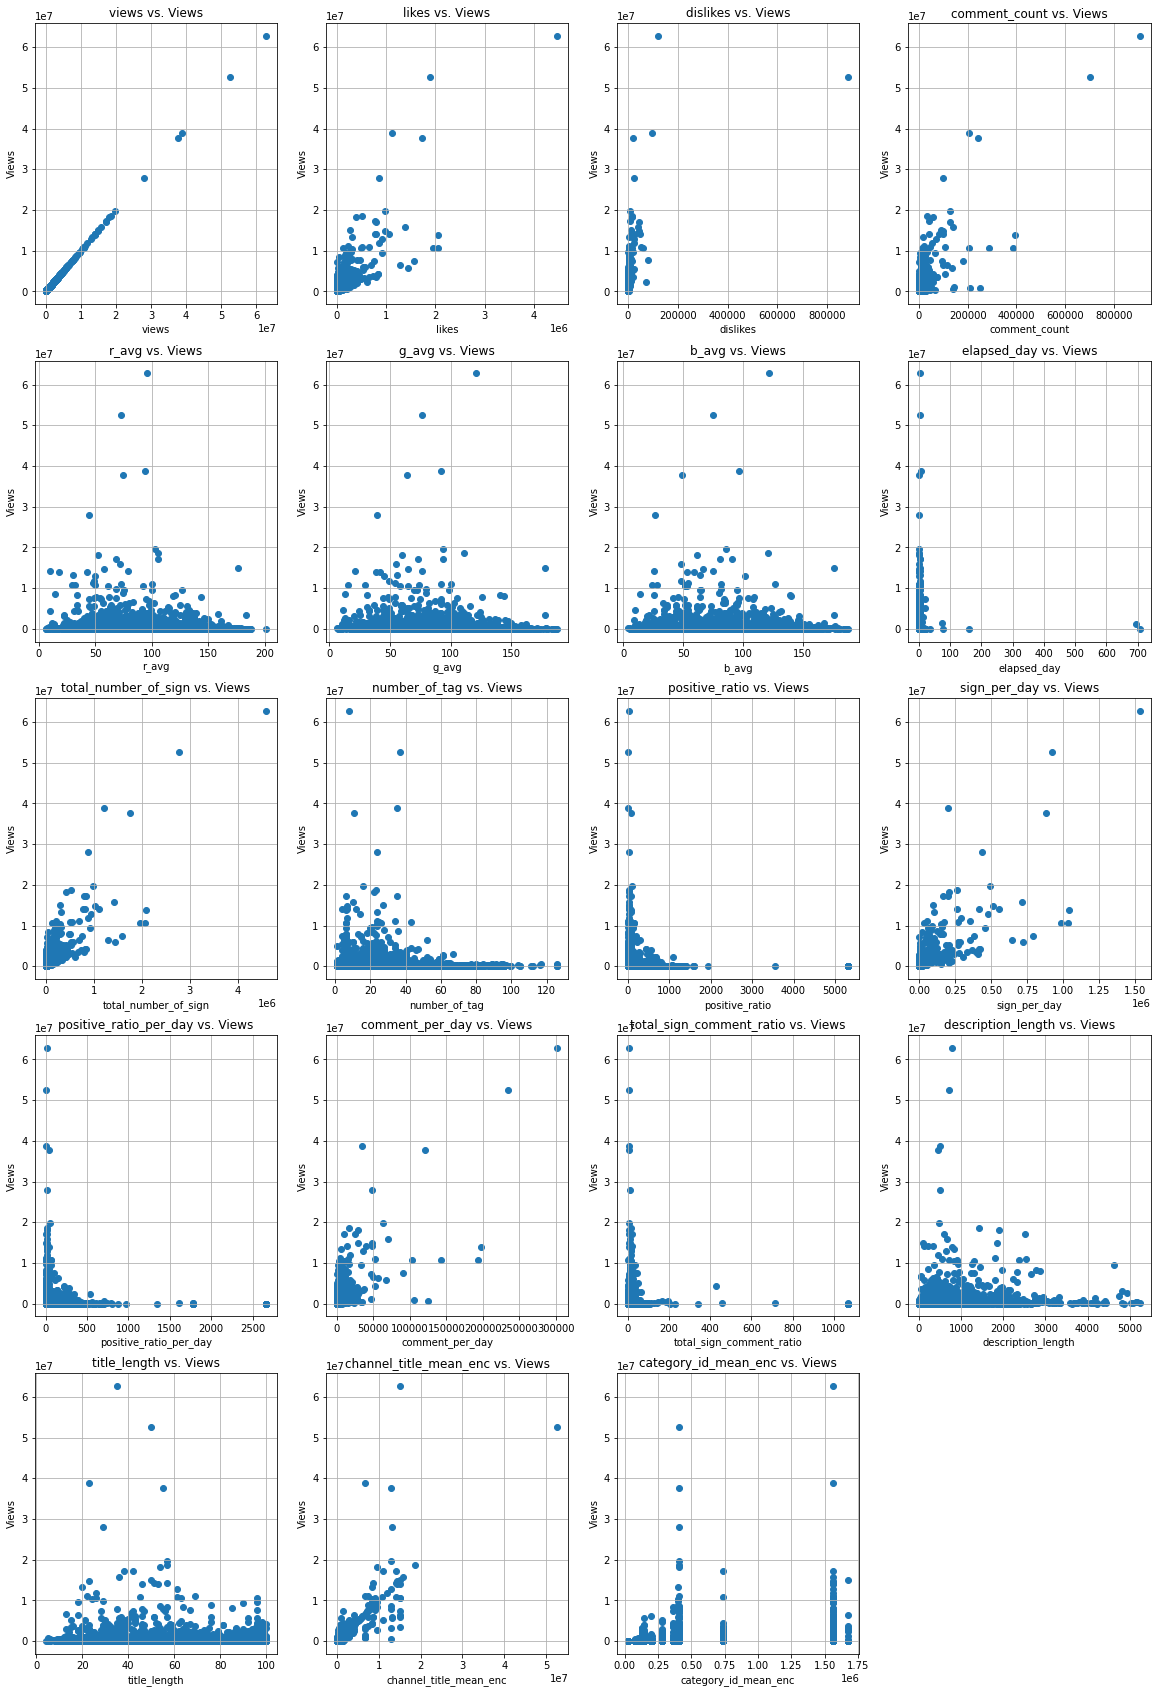

In [32]:
plt.figure(figsize=(20, 30))

for i in range(1, len(df_rgb2.describe().columns)):
    plt.subplot(5, 4, i)
    title = str(df_rgb2.describe().columns[i]) + ' vs. Views'
    plt.title(title)
    plt.xlabel(df_rgb2.describe().columns[i])
    plt.ylabel('Views')
    plt.grid()
    plt.scatter(df_rgb2[df_rgb2.describe().columns[i]], df_rgb2['views'])    

In [33]:
list(df_rgb2)

['video_id',
 'trending_date',
 'title',
 'channel_title',
 'category_id',
 'publish_time',
 'tags',
 'views',
 'likes',
 'dislikes',
 'comment_count',
 'thumbnail_link',
 'comments_disabled',
 'ratings_disabled',
 'video_error_or_removed',
 'description',
 'r_avg',
 'g_avg',
 'b_avg',
 'publish_time2',
 'publish_date',
 'elapsed_day',
 'total_number_of_sign',
 'number_of_tag',
 'positive_ratio',
 'sign_per_day',
 'positive_ratio_per_day',
 'comment_per_day',
 'total_sign_comment_ratio',
 'description_length',
 'title_length',
 'channel_title_mean_enc',
 'category_id_mean_enc']

                             likes  dislikes  comment_count  r_avg  g_avg  \
likes                     1.000000       NaN            NaN    NaN    NaN   
dislikes                       NaN       1.0            NaN    NaN    NaN   
comment_count                  NaN       NaN        1.00000    NaN    NaN   
r_avg                          NaN       NaN            NaN    1.0    NaN   
g_avg                          NaN       NaN            NaN    NaN    1.0   
b_avg                          NaN       NaN            NaN    NaN    NaN   
elapsed_day                    NaN       NaN            NaN    NaN    NaN   
number_of_tag                  NaN       NaN            NaN    NaN    NaN   
positive_ratio                 NaN       NaN            NaN    NaN    NaN   
sign_per_day              0.976345       NaN            NaN    NaN    NaN   
positive_ratio_per_day         NaN       NaN            NaN    NaN    NaN   
comment_per_day                NaN       NaN        0.97371    NaN    NaN   

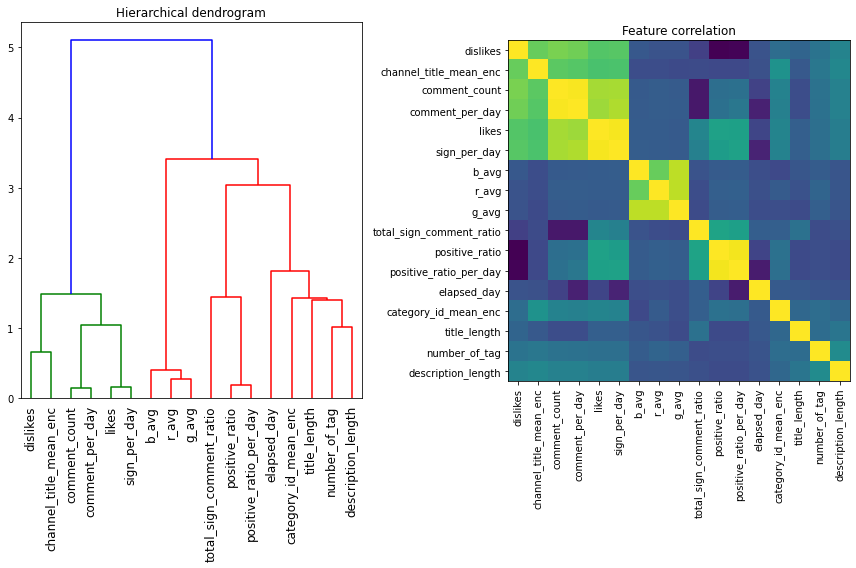

In [34]:
features = ['likes', 'dislikes', 'comment_count', 'r_avg', 'g_avg', 'b_avg', 'elapsed_day', 'number_of_tag',
            'positive_ratio', 'sign_per_day', 'positive_ratio_per_day', 'comment_per_day',
            'total_sign_comment_ratio', 'description_length', 'title_length', 'channel_title_mean_enc',
            'category_id_mean_enc']

x_input = df_rgb2[features]
cor_table = x_input.corr()

print(cor_table[cor_table > 0.9])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.set_title('Hierarchical dendrogram')
corr = spearmanr(x_input).correlation
corr_linkage = hierarchy.ward(corr)
dendro = hierarchy.dendrogram(corr_linkage, labels=features, ax=ax1, leaf_rotation=90)

dendro_idx = np.arange(0, len(dendro['ivl']))

ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
ax2.set_title('Feature correlation')
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro['ivl'], rotation='vertical')
ax2.set_yticklabels(dendro['ivl'])

fig.tight_layout()

                        likes  dislikes  comment_count  elapsed_day  \
likes                     1.0       NaN            NaN          NaN   
dislikes                  NaN       1.0            NaN          NaN   
comment_count             NaN       NaN            1.0          NaN   
elapsed_day               NaN       NaN            NaN          1.0   
number_of_tag             NaN       NaN            NaN          NaN   
positive_ratio            NaN       NaN            NaN          NaN   
description_length        NaN       NaN            NaN          NaN   
title_length              NaN       NaN            NaN          NaN   
r_avg                     NaN       NaN            NaN          NaN   
g_avg                     NaN       NaN            NaN          NaN   
b_avg                     NaN       NaN            NaN          NaN   
channel_title_mean_enc    NaN       NaN            NaN          NaN   
category_id_mean_enc      NaN       NaN            NaN          NaN   

     

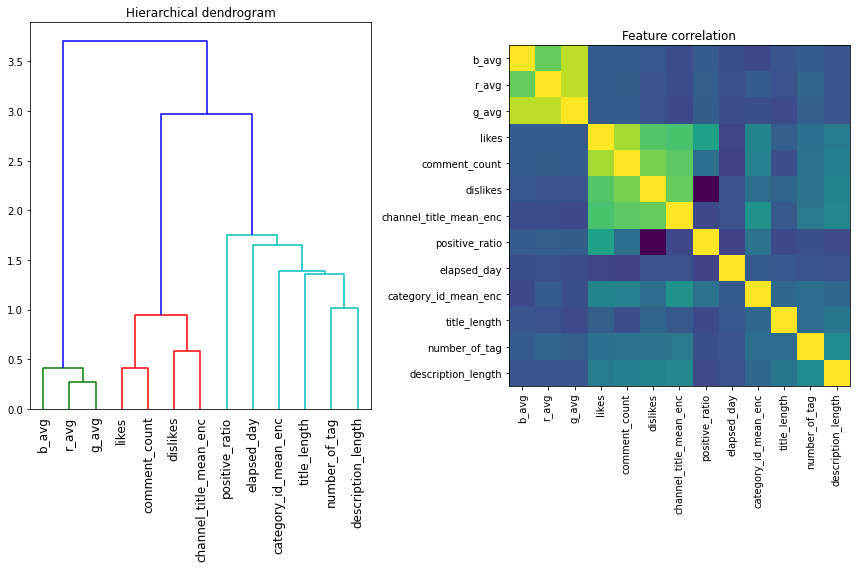

In [35]:
features = ['likes', 'dislikes', 'comment_count', 'elapsed_day', 'number_of_tag',
            'positive_ratio', 'description_length', 'title_length',
            'r_avg', 'g_avg', 'b_avg',  
            'channel_title_mean_enc', 'category_id_mean_enc']            

x_input = df_rgb2[features]
cor_table = x_input.corr()
print(cor_table[cor_table > 0.9])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.set_title('Hierarchical dendrogram')
corr = spearmanr(x_input).correlation
corr_linkage = hierarchy.ward(corr)
dendro = hierarchy.dendrogram(corr_linkage, labels=features, ax=ax1, leaf_rotation=90)

dendro_idx = np.arange(0, len(dendro['ivl']))

ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
ax2.set_title('Feature correlation')
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro['ivl'], rotation='vertical')
ax2.set_yticklabels(dendro['ivl'])

fig.tight_layout()

In [36]:
y_output = df_rgb2['views']

x_train, x_test, y_train, y_test = train_test_split(x_input, y_output, random_state=42)

#**4. Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÎßÅ**

In [37]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#**5. Î™®Îç∏ ÏÉùÏÑ± Î∞è ÏµúÏ†ÅÌôî**

In [38]:
model_name = []
train_perf = []
test_perf = []

Fitting 5 folds for each of 1900 candidates, totalling 9500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 3018 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 8138 tasks      | elapsed:   42.9s


Best_estimator: ElasticNet(alpha=0.0021000000000000007, copy_X=True, fit_intercept=True,
           l1_ratio=0.905, max_iter=100000000, normalize=False, positive=False,
           precompute=False, random_state=42, selection='cyclic', tol=0.316,
           warm_start=False)
Best_params: {'alpha': 0.0021000000000000007, 'l1_ratio': 0.905, 'tol': 0.316}
Best_score: 0.757726111238717
Train score: 0.7230936195190262
Test  score: 0.6926238877149506


[Parallel(n_jobs=-1)]: Done 9500 out of 9500 | elapsed:   49.6s finished


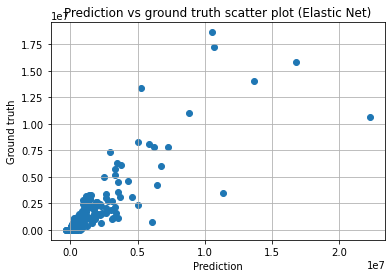

In [39]:
en_model = ElasticNet(max_iter=100000000, random_state=42)

en_param = {'l1_ratio': np.arange(0.9, 0.995, 0.005),
            'alpha': np.arange(0.0008, 0.0028, 0.0001),
            'tol': [1e-2, 3.16e-2, 1e-1, 3.16e-1, 1e0]}

clf = GridSearchCV(estimator=en_model, param_grid=en_param, n_jobs=-1, verbose=3)
clf.fit(x_train_scaled, y_train)
y_train_pred = clf.predict(x_train_scaled)
y_test_pred = clf.predict(x_test_scaled)

print('Best_estimator:', clf.best_estimator_)
print('Best_params:', clf.best_params_)
print('Best_score:', clf.best_score_)
train_score = r2_score(y_train_pred, y_train)
print('Train score:', train_score)
test_score = r2_score(y_test_pred, y_test)
print('Test  score:', test_score)

model_name.append('Elastic Net')
train_perf.append(train_score)
test_perf.append(test_score)

plt.title('Prediction vs ground truth scatter plot (Elastic Net)')
plt.xlabel('Prediction')
plt.ylabel('Ground truth')
plt.grid()
plt.scatter(y_test_pred, y_test)

In [40]:
en_model = ElasticNet(alpha=0.0027, l1_ratio=0.96, tol=0.1, max_iter=100000000, random_state=42)

In [41]:
rf_model = RandomForestRegressor(n_jobs=-1, random_state=42)

rf_param = {'n_estimators': range(76, 136, 20),
            'max_depth': range(30, 42, 4),
            'min_samples_split': range(2, 5, 1)}

clf = GridSearchCV(estimator=rf_model, param_grid=rf_param, n_jobs=-1, verbose=2)

clf.fit(x_train_scaled, y_train)
y_train_pred = clf.predict(x_train_scaled)
y_test_pred = clf.predict(x_test_scaled)

print('Best_estimator:', clf.best_estimator_)
print('Best_params:', clf.best_params_)
print('Best_score:', clf.best_score_)
train_score = r2_score(y_train_pred, y_train)
print('Train score:', train_score)
test_score = r2_score(y_test_pred, y_test)
print('Test  score:', test_score)

model_name.append('Random Forest')
train_perf.append(train_score)
test_perf.append(test_score)

plt.title('Prediction vs ground truth scatter plot (Random Forest)')
plt.xlabel('Prediction')
plt.ylabel('Ground truth')
plt.grid()
plt.scatter(y_test_pred, y_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  6.0min finished


Best_estimator: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=34, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=76, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
Best_params: {'max_depth': 34, 'min_samples_split': 2, 'n_estimators': 76}
Best_score: 0.7412252610227263
Train score: 0.9645290764374408
Test  score: 0.8352688041254241


In [42]:
rf_model = RandomForestRegressor(n_estimators=96, max_depth=34, min_samples_split=3, n_jobs=-1, random_state=42)

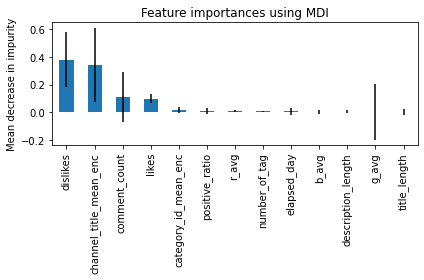

In [43]:
rf_model.fit(x_train_scaled, y_train)

feature_names = ['feature {i}' for i in range(x_train_scaled.shape[1])]

importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)

forest_importances = pd.Series(importances, index=features)
forest_importances = forest_importances.sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

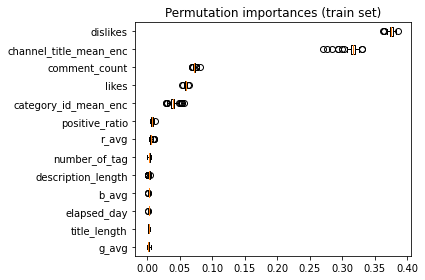

In [44]:
result = permutation_importance(rf_model, x_train_scaled, y_train, n_repeats=100, n_jobs=-1, random_state=42)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=x_train.columns[sorted_idx])
ax.set_title("Permutation importances (train set)")
fig.tight_layout()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.6min finished


Best_estimator: MLPRegressor(activation='relu', alpha=0.00011387059213756816, batch_size='auto',
             beta_1=0.9, beta_2=0.999, early_stopping=True, epsilon=1e-08,
             hidden_layer_sizes=(28, 29, 26, 31), learning_rate='adaptive',
             learning_rate_init=0.001, max_fun=15000, max_iter=2000000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=0, warm_start=False)
Best_params: {'alpha': 0.00011387059213756816, 'hidden_layer_sizes': (28, 29, 26, 31)}
Best_score: 0.5360219562474922
Train score: 0.6721535799313008
Test  score: 0.7515161749302803


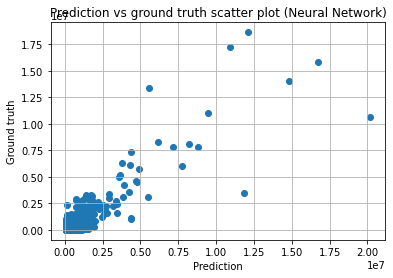

In [45]:
mlp_model = MLPRegressor(learning_rate='adaptive', max_iter=2000000, verbose=0,
                         early_stopping=True, random_state=42)

mlp_param = {'hidden_layer_sizes': [x for x in itertools.product((range(24, 32)), repeat=4)],
             'alpha': loguniform(1e-4, 1e-3)}

rand_clf = RandomizedSearchCV(estimator=mlp_model, param_distributions=mlp_param, n_iter=10, n_jobs=-1,
                              cv=3, verbose=2, random_state=42)

rand_clf.fit(x_train_scaled, y_train)

y_train_pred = rand_clf.predict(x_train_scaled)
y_test_pred = rand_clf.predict(x_test_scaled)

print('Best_estimator:', rand_clf.best_estimator_)
print('Best_params:', rand_clf.best_params_)
print('Best_score:', rand_clf.best_score_)
train_score = r2_score(y_train_pred, y_train)
print('Train score:', train_score)
test_score = r2_score(y_test_pred, y_test)
print('Test  score:', test_score)

model_name.append('Neural Network')
train_perf.append(train_score)
test_perf.append(test_score)
plt.title('Prediction vs ground truth scatter plot (Neural Network)')
plt.xlabel('Prediction')
plt.ylabel('Ground truth')
plt.grid()
plt.scatter(y_test_pred, y_test)

In [46]:
mlp_model = MLPRegressor(hidden_layer_sizes=(24, 27, 28, 31), alpha=2.715e-4, learning_rate='adaptive',
                         max_iter=2000000, verbose=0, early_stopping=True, random_state=42)

In [47]:
xgb_model = XGBRegressor(n_jobs=-1, random_state=42)

xgb_param = {'n_estimators': range(80, 140, 20),
             'max_depth': range(2, 5, 1),
             'reg_alpha': [1e-2, 3.16e-2, 1e-1],
             'reg_lambda': [0.1, 0.316, 1]}

xgb_clf = GridSearchCV(estimator=xgb_model, param_grid=xgb_param, n_jobs=-1, verbose=2, cv=3)

xgb_clf.fit(x_train_scaled, y_train)
y_train_pred = xgb_clf.predict(x_train_scaled)
y_test_pred = xgb_clf.predict(x_test_scaled)

print('Best_estimator:', xgb_clf.best_estimator_)
print('Best_params:', xgb_clf.best_params_)
print('Best_score:', xgb_clf.best_score_)
train_score = r2_score(y_train_pred, y_train)
print('Train score:', train_score)
test_score = r2_score(y_test_pred, y_test)
print('Test  score:', test_score)

model_name.append('XGBoost')
train_perf.append(train_score)
test_perf.append(test_score)

plt.title('Prediction vs ground truth scatter plot (XGBoost)')
plt.xlabel('Prediction')
plt.ylabel('Ground truth')
plt.grid()
plt.scatter(y_test_pred, y_test)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:   48.4s finished


[23:00:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best_estimator: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=120,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0.1, reg_lambda=0.316, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
Best_params: {'max_depth': 2, 'n_estimators': 120, 'reg_alpha': 0.1, 'reg_lambda': 0.316}
Best_score: 0.8223720952696194
Train score: 0.9820184306054018
Test  score: 0.8583923664418808


In [48]:
xgb_model = XGBRegressor(max_depth=4, n_estimators=120, reg_alpha=0.1, reg_lambda=0.1, n_jobs=-1, random_state=42)

In [49]:
svr_model = SVR()

svr_param = {'C': [3.16e7, 1e8],
             'gamma': [0.1, 0.316]}

svr_clf = GridSearchCV(estimator=svr_model, param_grid=svr_param, n_jobs=-1, verbose=3, cv=3)

svr_clf.fit(x_train_scaled, y_train)
y_train_pred = svr_clf.predict(x_train_scaled)
y_test_pred = svr_clf.predict(x_test_scaled)

print('Best_estimator:', svr_clf.best_estimator_)
print('Best_params:', svr_clf.best_params_)
print('Best_score:', svr_clf.best_score_)
train_score = r2_score(y_train_pred, y_train)
print('Train score:', train_score)
test_score = r2_score(y_test_pred, y_test)
print('Test  score:', test_score)

model_name.append('SVM')
train_perf.append(train_score)
test_perf.append(test_score)

plt.title('Prediction vs ground truth scatter plot (SVM)')
plt.xlabel('Prediction')
plt.ylabel('Ground truth')
plt.grid()
plt.scatter(y_test_pred, y_test)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  3.2min finished


Best_estimator: SVR(C=100000000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Best_params: {'C': 100000000.0, 'gamma': 0.1}
Best_score: 0.7388959220400236
Train score: 0.66659250504814
Test  score: 0.8492559152109472


In [50]:
svr_model = SVR(C=1e8, gamma=0.1)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   25.1s finished


Best_estimator: KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                    weights='distance')
Best_params: {'leaf_size': 1, 'n_neighbors': 3, 'weights': 'distance'}
Best_score: 0.4502175056062224
Train score: 1.0
Test  score: 0.22770469044450914


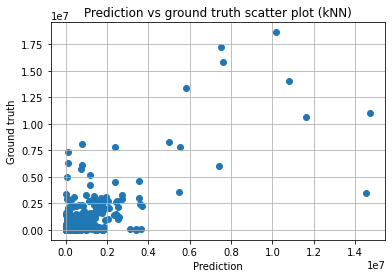

In [51]:
knn_model = KNeighborsRegressor(n_jobs=-1)

knn_param = {'n_neighbors': range(1, 6, 1),
             'weights': ['uniform', 'distance'],
             'leaf_size': range(1, 5, 1)}

knn_clf = GridSearchCV(estimator=knn_model, param_grid=knn_param, n_jobs=-1, verbose=3)

knn_clf.fit(x_train_scaled, y_train)
y_train_pred = knn_clf.predict(x_train_scaled)
y_test_pred = knn_clf.predict(x_test_scaled)

print('Best_estimator:', knn_clf.best_estimator_)
print('Best_params:', knn_clf.best_params_)
print('Best_score:', knn_clf.best_score_)
print('Train score:', r2_score(y_train_pred, y_train))
print('Test  score:', r2_score(y_test_pred, y_test))

plt.title('Prediction vs ground truth scatter plot (kNN)')
plt.xlabel('Prediction')
plt.ylabel('Ground truth')
plt.grid()
plt.scatter(y_test_pred, y_test)

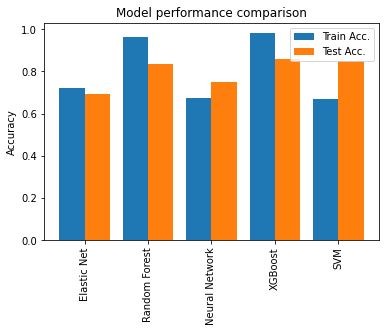

In [52]:
plt.title('Model performance comparison')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')

x = np.arange(len(model_name))
plt.xticks(x, model_name)
plt.bar(x - 0.2, train_perf, width=0.4, label='Train Acc.')
plt.bar(x + 0.2, test_perf, width=0.4, label='Test Acc.')
plt.legend()

#**6. Î™®Îç∏ ÏïôÏÉÅÎ∏î**

In [53]:
ensemble_list = [('xgb', xgb_model),
                 ('rf', rf_model),
                 ('svm', svr_model),
                 ('mlp', mlp_model),
                 ('en', en_model)]

voting_est = []

for idx, target_model in enumerate(ensemble_list):
    voting_est.append(target_model)

    voting_clf = VotingRegressor(estimators=voting_est, n_jobs=-1)
    voting_clf.fit(x_train_scaled, y_train)
    y_train_pred = voting_clf.predict(x_train_scaled)
    y_test_pred = voting_clf.predict(x_test_scaled)
    print(idx + 1, 'Ensemble train score:', r2_score(y_train_pred, y_train))
    print(idx + 1, 'Ensemble test  score:', r2_score(y_test_pred, y_test))

    plt.scatter(y_test_pred, y_test, label=str(idx + 1), alpha=0.5)
    title = 'Prediction vs ground truth scatter plot: Ensemble'     
    plt.title(title)
    plt.xlabel('Prediction')
    plt.ylabel('Ground truth')
    plt.grid()
    plt.legend()

1 Ensemble train score: 0.9967429097656472
1 Ensemble test  score: 0.8751867858547804
2 Ensemble train score: 0.9882698625461269
2 Ensemble test  score: 0.8687625485736389
3 Ensemble train score: 0.9405323971482209
3 Ensemble test  score: 0.8831157732956479
4 Ensemble train score: 0.9118678768570471
4 Ensemble test  score: 0.8724901138777681
5 Ensemble train score: 0.8867348730970719
5 Ensemble test  score: 0.8565692097454212


In [54]:
voting_clf = VotingRegressor(estimators=[('xgb', xgb_model), ('rf', rf_model), ('svm', svr_model)],
                             n_jobs=-1)
voting_clf.fit(x_train_scaled, y_train)

VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=4, min_child_weight=1,
                                          missing=None, n_estimators=120,
                                          n_jobs=-1, nthread=None,
                                          objective='reg:linear',
                                          random_state=42, reg_alpha=0.1,
                                          reg_lambd...
                                                   min_impurity_split=None,
                                                   min_sampl

#**7. ÌäπÏÑ±(ÌîºÏ≥ê) Ï§ëÏöîÎèÑ Î∂ÑÏÑù**

In [55]:
result = permutation_importance(voting_clf, x_train_scaled, y_train, n_repeats=100, n_jobs=-1, random_state=42)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=x_train.columns[sorted_idx])
ax.set_title("Permutation importances (train set)")
fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [56]:
x_total = np.concatenate((x_train, x_test), axis=0)
y_total = np.concatenate((y_train, y_test), axis=0)

x_total_scaled = scaler.transform(x_total)

voting_clf.fit(x_total_scaled, y_total)

VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=4, min_child_weight=1,
                                          missing=None, n_estimators=120,
                                          n_jobs=-1, nthread=None,
                                          objective='reg:linear',
                                          random_state=42, reg_alpha=0.1,
                                          reg_lambd...
                                                   min_impurity_split=None,
                                                   min_sampl

#**8. Ïú†Ï†Ñ ÏïåÍ≥†Î¶¨Ï¶ò - ÏµúÏ†Å ÌîºÏ≥ê ÌÉêÏÉâ: ÏùºÎ∞ò YouTuber**

In [57]:
df_rgb2['views'].describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99])

count    6.660000e+03
mean     3.679328e+05
std      1.650656e+06
min      2.623000e+03
50%      9.867750e+04
75%      2.331160e+05
90%      5.599660e+05
95%      1.151854e+06
99%      5.137745e+06
max      6.279639e+07
Name: views, dtype: float64

In [58]:
# features = ['likes', 'dislikes', 'comment_count', 'elapsed_day', 'number_of_tag', 'positive_ratio',
#             'description_length', 'title_length', 'r_avg', 'g_avg', 'b_avg', 'channel_title_mean_enc',
#             'category_id_mean_enc']

# 0: 'likes'
# 1: 'dislikes'
# 2: 'comment_count'
# 3: 'elapsed_day'
# 4: 'number_of_tag'
# 5: 'positive_ratio'
# 6: 'description_length'
# 7: 'title_length'
# 8: 'r_avg'
# 9: 'g_avg'
# 10: 'b_avg'
# 11: 'channel_title_mean_enc'
# 12: 'category_id_mean_enc'


def input_conversion(x_input):
    conversion = [int(x_input[0]),
                  int(x_input[1]),
                  int(x_input[2]),
                  int(x_input[3]),
                  int(x_input[4]),
                  x_input[0] / x_input[1],
                  int(x_input[5]),
                  int(x_input[6]),
                  int(x_input[7]),
                  int(x_input[8]),
                  int(x_input[9]),
                  mean_encode_channel.iloc[int(x_input[10])],
                  mean_encode_category.iloc[int(x_input[11])]]

    return conversion

In [59]:
# 0: 'likes'
# 1: 'dislikes'
# 2: 'comment_count'
# 3: 'elapsed_day'
# 4: 'number_of_tag'
# 5: 'positive_ratio'
# 6: 'description_length'
# 7: 'title_length'
# 8: 'r_avg'
# 9: 'g_avg'
# 10: 'b_avg'
# 11: 'channel_title_mean_enc'
# 12: 'category_id_mean_enc'

varbound = np.array([[df_rgb2['likes'].min(), df_rgb2['likes'].max()],
                     [df_rgb2['dislikes'].min() + 1, df_rgb2['dislikes'].max()],
                     [df_rgb2['comment_count'].min() + 1, df_rgb2['comment_count'].max()],
                     [df_rgb2['elapsed_day'].min(), df_rgb2['elapsed_day'].max()],
                     [df_rgb2['number_of_tag'].min(), df_rgb2['number_of_tag'].max()],
                     [df_rgb2['description_length'].min(), df_rgb2['description_length'].max()],
                     [df_rgb2['title_length'].min(), df_rgb2['title_length'].max()],
                     [df_rgb2['r_avg'].min(), df_rgb2['r_avg'].max()],
                     [df_rgb2['g_avg'].min(), df_rgb2['g_avg'].max()],
                     [df_rgb2['b_avg'].min(), df_rgb2['b_avg'].max()],
                     [0, len(mean_encode_channel) - 1],
                     # [0, len(mean_encode_category) - 1]],
                     [2, 2]])

In [60]:
def object_function_median(x_input, target_model=voting_clf):
    input_converted = input_conversion(x_input)
    input_converted = np.array(input_converted).reshape(1, -1)

    input_scaled = scaler.transform(input_converted)
    prediction = target_model.predict(input_scaled)        

    target = df_rgb2['views'].median()
    print('Predicted views:', int(prediction), 'Difference from target:', int(prediction - target))

    # return abs(int(prediction) - target)
    return math.log(abs(target - int(prediction))) 

In [61]:
algorithm_param = {'max_num_iteration': 300,
                   'population_size': 100,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

In [62]:
model_ga_median = geneticalgorithm(function=object_function_median,
                                   dimension=12,
                                   variable_type='int',
                                   variable_boundaries=varbound,
                                   algorithm_parameters=algorithm_param)

model_ga_median.run()

Streaming output truncated to the last 5000 lines.
Predicted views: 3378884 Difference from target: 3280207
Predicted views: 162797 Difference from target: 64120
Predicted views: 127485 Difference from target: 28807
Predicted views: 1260275 Difference from target: 1161597
Predicted views: 267370 Difference from target: 168692
Predicted views: 170887 Difference from target: 72210
Predicted views: 167230 Difference from target: 68553
Predicted views: 445196 Difference from target: 346518
Predicted views: 199857 Difference from target: 101180
Predicted views: 114691 Difference from target: 16013
Predicted views: 317459 Difference from target: 218782
Predicted views: 9983655 Difference from target: 9884977
Predicted views: 161934 Difference from target: 63256
Predicted views: 1300977 Difference from target: 1202300
Predicted views: 158399 Difference from target: 59721
Predicted views: 6076353 Difference from target: 5977676
Predicted views: 14792542 Difference from target: 14693864
Predict

In [63]:
convergence_median = model_ga_median.report
solution_median = model_ga_median.output_dict

print(convergence_median)
print(solution_median)

[15.635624301692522, 15.635624301692522, 15.15074751792425, 15.121811449781733, 15.121811449781733, 15.021996352084724, 15.021996352084724, 14.667949253016571, 14.667949253016571, 14.667949253016571, 14.667949253016571, 14.667949253016571, 14.667949253016571, 14.667434913883026, 14.659125430183435, 14.659125430183435, 14.659125430183435, 14.649342950207245, 14.649342950207245, 13.877702421603638, 13.823388941836797, 13.78296722142771, 13.78296722142771, 13.761992158286095, 13.761992158286095, 13.65946650350064, 13.580718803977955, 13.580718803977955, 13.492148111290353, 13.425267750512138, 13.425267750512138, 13.383043917510856, 13.25129031075744, 13.25129031075744, 13.25129031075744, 13.25129031075744, 13.162884206578854, 13.162884206578854, 13.162884206578854, 13.162884206578854, 13.162884206578854, 13.162884206578854, 13.162884206578854, 13.155493464911372, 13.106692223805139, 12.933760132052171, 12.83187336638032, 12.826602089137975, 12.826602089137975, 12.826602089137975, 12.82660

In [64]:
ga_solution = input_conversion(solution_median['variable'])
ga_solution = np.array(ga_solution).reshape(1, -1)

ga_solution_df = pd.DataFrame(ga_solution, columns=features)
ga_solution_df

likes  dislikes  comment_count  elapsed_day  number_of_tag  \
0  9806.0    2161.0         5576.0          3.0          111.0   

   positive_ratio  description_length  title_length  r_avg  g_avg  b_avg  \
0        4.537714              1897.0           7.0   53.0   18.0   15.0   

   channel_title_mean_enc  category_id_mean_enc  
0                 12495.0          1.563406e+06

In [65]:
channel_title = mean_encode_channel[mean_encode_channel.isin(ga_solution_df['channel_title_mean_enc'])].index[0]
ga_solution_df['channel_title_mean_enc'] = channel_title
ga_solution_df = ga_solution_df.rename(columns={'channel_title_mean_enc': 'channel_title'})

category_id = mean_encode_category[mean_encode_category.isin(ga_solution_df['category_id_mean_enc'])].index[0]
ga_solution_df['category_id_mean_enc'] = category_id
ga_solution_df = ga_solution_df.rename(columns={'category_id_mean_enc': 'category_id'})
ga_solution_df

likes  dislikes  comment_count  elapsed_day  number_of_tag  \
0  9806.0    2161.0         5576.0          3.0          111.0   

   positive_ratio  description_length  title_length  r_avg  g_avg  b_avg  \
0        4.537714              1897.0           7.0   53.0   18.0   15.0   

  channel_title  category_id  
0   KSV eSports           10

In [66]:
ga_solution_df['category_id'] = category_id_code[str(ga_solution_df['category_id'][0])]
ga_solution_df = ga_solution_df.rename(columns={'category_id': 'category'})
ga_solution_df

likes  dislikes  comment_count  elapsed_day  number_of_tag  \
0  9806.0    2161.0         5576.0          3.0          111.0   

   positive_ratio  description_length  title_length  r_avg  g_avg  b_avg  \
0        4.537714              1897.0           7.0   53.0   18.0   15.0   

  channel_title category  
0   KSV eSports    Music

In [67]:
prediction = voting_clf.predict(scaler.transform(ga_solution))
ga_solution_df['Views'] = int(prediction[0])
ga_solution_median = ga_solution_df
ga_solution_median

likes  dislikes  comment_count  elapsed_day  number_of_tag  \
0  9806.0    2161.0         5576.0          3.0          111.0   

   positive_ratio  description_length  title_length  r_avg  g_avg  b_avg  \
0        4.537714              1897.0           7.0   53.0   18.0   15.0   

  channel_title category  Views  
0   KSV eSports    Music  98683

#**9. Í≤∞Í≥º Í≤ÄÌÜ† Î∞è Î∂ÑÏÑù: ÏùºÎ∞ò YouTuber**

In [68]:
df_rgb2.describe()

category_id         views         likes       dislikes  comment_count  \
count  6660.000000  6.660000e+03  6.660000e+03    6660.000000    6660.000000   
mean     21.178228  3.679328e+05  1.517848e+04     516.760210    2351.420420   
std       6.762678  1.650656e+06  1.029162e+05   11250.755719   18606.078576   
min       1.000000  2.623000e+03  2.000000e+00       0.000000       0.000000   
25%      20.000000  4.410425e+04  6.875000e+02      20.000000     152.000000   
50%      24.000000  9.867750e+04  2.041000e+03      54.000000     429.000000   
75%      25.000000  2.331160e+05  4.763500e+03     142.000000    1085.000000   
max      43.000000  6.279639e+07  4.470923e+06  884965.000000  905925.000000   

             r_avg        g_avg        b_avg  elapsed_day  \
count  6660.000000  6660.000000  6660.000000  6660.000000   
mean     94.594595    87.217718    85.692793     2.535285   
std      31.142526    29.403190    29.615434    12.361518   
min       6.000000     6.000000     4.000000     1.000000   
25%      74.000000    68.000000    66.000000     2.000000   
50%      95.000000    87.000000    84.000000     2.000000   
75%     116.000000   107.000000   105.000000     2.000000   
max     201.000000   188.000000   188.000000   706.000000   

       total_number_of_sign  number_of_tag  positive_ratio  sign_per_day  \
count          6.660000e+03    6660.000000     6660.000000  6.660000e+03   
mean           1.569524e+04      21.761411      107.374173  7.203854e+03   
std            1.078618e+05      18.008257      416.542044  4.669991e+04   
min            2.000000e+00       1.000000        0.161180  3.703704e-02   
25%            7.447500e+02       8.000000       14.277114  3.350000e+02   
50%            2.164000e+03      17.000000       35.345000  1.007500e+03   
75%            4.919000e+03      30.000000       79.090295  2.398500e+03   
max            4.589976e+06     126.000000     5325.750000  1.529992e+06   

       positive_ratio_per_day  comment_per_day  total_sign_comment_ratio  \
count             6660.000000      6660.000000               6660.000000   
mean                50.651204      1075.410628                  9.752234   
std                194.373689      7482.807020                 47.784162   
min                  0.012151         0.000000                  0.185734   
25%                  6.419956        67.000000                  2.800669   
50%                 16.603958       199.166667                  5.175674   
75%                 37.909452       518.000000                  9.104006   
max               2662.875000    301975.000000               1071.000000   

       description_length  title_length  channel_title_mean_enc  \
count         6660.000000   6660.000000            6.660000e+03   
mean           431.890390     43.293393            3.679328e+05   
std            533.755556     19.589321            1.351592e+06   
min              1.000000      4.000000            2.623000e+03   
25%            122.000000     28.000000            5.967391e+04   
50%            263.500000     41.000000            1.216400e+05   
75%            534.000000     55.000000            2.423650e+05   
max           5235.000000    100.000000            5.261173e+07   

       category_id_mean_enc  
count          6.660000e+03  
mean           3.679328e+05  
std            3.695106e+05  
min            2.332710e+04  
25%            1.296611e+05  
50%            2.769006e+05  
75%            4.098237e+05  
max            1.678646e+06

In [69]:
inf_input = copy.deepcopy(model_ga_median)

comment_count_dep_median = []

for i in tqdm.tqdm(range(df_rgb2['comment_count'].min(), df_rgb2['comment_count'].max(), 1000)):    
    inf_input.output_dict['variable'][2] = i
    input_converted = input_conversion(inf_input.output_dict['variable'])
    input_converted = np.array(input_converted).reshape(1, -1)

    input_scaled = scaler.transform(input_converted)
    prediction = voting_clf.predict(input_scaled)    
    comment_count_dep_median.append([i, int(prediction)])

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 906/906 [01:41<00:00,  8.94it/s]


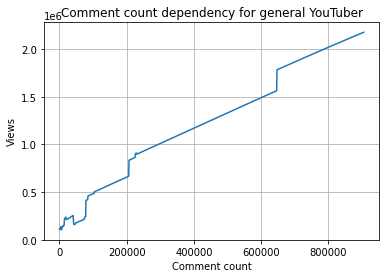

In [70]:
comment_count_dep_median_df = pd.DataFrame(comment_count_dep_median, columns=['comment_count', 'views'])

plt.title('Comment count dependency for general YouTuber')
plt.xlabel('Comment count')
plt.ylabel('Views')
plt.grid()
plt.plot(comment_count_dep_median_df['comment_count'], comment_count_dep_median_df['views'])

In [71]:
inf_input = copy.deepcopy(model_ga_median)

positive_ratio_dep_median = []

total_sign = inf_input.output_dict['variable'][0] + inf_input.output_dict['variable'][1]
calculation_plot = 500
step = total_sign / calculation_plot

for i in tqdm.tqdm(np.arange(1, total_sign, step)):    
    inf_input.output_dict['variable'][0] = int(i)
    inf_input.output_dict['variable'][1] = total_sign - int(i)
    ratio = inf_input.output_dict['variable'][0] / inf_input.output_dict['variable'][1]

    input_converted = input_conversion(inf_input.output_dict['variable'])
    input_converted = np.array(input_converted).reshape(1, -1)

    input_scaled = scaler.transform(input_converted)
    prediction = voting_clf.predict(input_scaled)   
    positive_ratio_dep_median.append([ratio, int(prediction)])

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:55<00:00,  8.96it/s]


<BarContainer object of 500 artists>

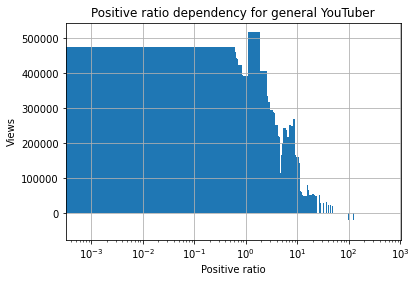

In [72]:
positive_ratio_dep_median_df = pd.DataFrame(positive_ratio_dep_median, columns=['positive_ratio', 'views'])

plt.title('Positive ratio dependency for general YouTuber')
plt.xlabel('Positive ratio')
plt.ylabel('Views')
plt.xscale('log')
plt.grid()
plt.bar(positive_ratio_dep_median_df['positive_ratio'], positive_ratio_dep_median_df['views'])

In [73]:
inf_input = copy.deepcopy(model_ga_median)

number_of_tag_dep_median = []

for i in tqdm.tqdm(range(df_rgb2['number_of_tag'].min(), df_rgb2['number_of_tag'].max())):    
    inf_input.output_dict['variable'][4] = i
    input_converted = input_conversion(inf_input.output_dict['variable'])
    input_converted = np.array(input_converted).reshape(1, -1)

    input_scaled = scaler.transform(input_converted)
    prediction = voting_clf.predict(input_scaled)   
    number_of_tag_dep_median.append([i, int(prediction)])

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 125/125 [00:13<00:00,  9.02it/s]


<BarContainer object of 125 artists>

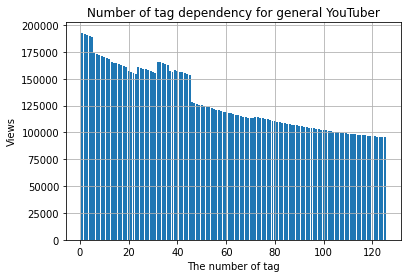

In [74]:
number_of_tag_dep_median_df = pd.DataFrame(number_of_tag_dep_median, columns=['number_of_tag', 'views'])

plt.title('Number of tag dependency for general YouTuber')
plt.xlabel('The number of tag')
plt.ylabel('Views')
plt.grid()
plt.bar(number_of_tag_dep_median_df['number_of_tag'], number_of_tag_dep_median_df['views'])

In [75]:
inf_input = copy.deepcopy(model_ga_median)

random_image_dep_median = []

for i in tqdm.tqdm(range(2000)):    
    inf_input.output_dict['variable'][7] = randint(df_rgb2['r_avg'].min(), df_rgb2['r_avg'].max())
    inf_input.output_dict['variable'][8] = randint(df_rgb2['g_avg'].min(), df_rgb2['g_avg'].max())
    inf_input.output_dict['variable'][9] = randint(df_rgb2['b_avg'].min(), df_rgb2['b_avg'].max())
    input_converted = input_conversion(inf_input.output_dict['variable'])
    input_converted = np.array(input_converted).reshape(1, -1)

    input_scaled = scaler.transform(input_converted)
    prediction = voting_clf.predict(input_scaled)    
    random_image_dep_median.append([i, int(prediction)])

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2000/2000 [03:44<00:00,  8.92it/s]


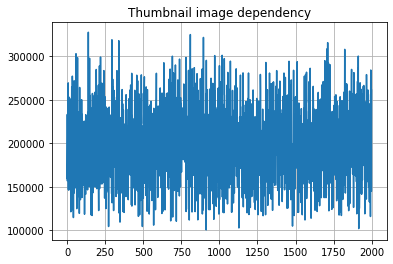

In [76]:
random_image_dep_median_df = pd.DataFrame(random_image_dep_median, columns=['Random_image', 'Views'])

plt.grid()
plt.title('Thumbnail image dependency')
plt.plot(random_image_dep_median_df['Random_image'], random_image_dep_median_df['Views'])

Average views: 198443.6425
Median views: 198473.0
Standard deviation of views [count]: 41243.876222496634
Standard deviation of views     [%]: 20.78367223202761


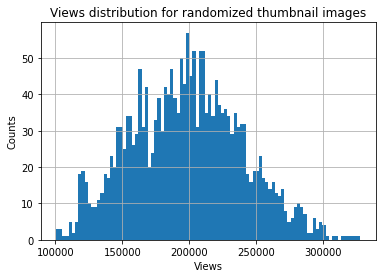

In [77]:
plt.grid()
plt.title('Views distribution for randomized thumbnail images')
plt.xlabel('Views')
plt.ylabel('Counts')
plt.hist(random_image_dep_median_df['Views'], bins=96)

print('Average views:', random_image_dep_median_df['Views'].mean())
print('Median views:', random_image_dep_median_df['Views'].median())
print('Standard deviation of views [count]:', random_image_dep_median_df['Views'].std())
print('Standard deviation of views     [%]:', random_image_dep_median_df['Views'].std()*100 / random_image_dep_median_df['Views'].mean())

In [78]:
inf_input = copy.deepcopy(model_ga_median)

channel_title_dep_median = []

for i in tqdm.tqdm(range(len(mean_encode_channel))):
    inf_input.output_dict['variable'][10] = i 
    
    input_converted = input_conversion(inf_input.output_dict['variable'])
    input_converted = np.array(input_converted).reshape(1, -1)

    input_scaled = scaler.transform(input_converted)
    prediction = voting_clf.predict(input_scaled)    
    channel_title_dep_median.append([mean_encode_channel.index[i], int(prediction)])

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1493/1493 [02:46<00:00,  8.97it/s]


<BarContainer object of 1493 artists>

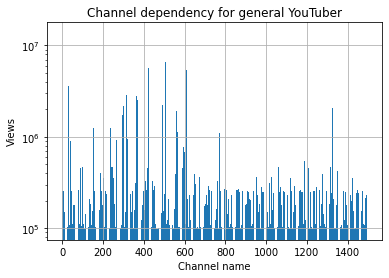

In [79]:
channel_title_dep_median_df = pd.DataFrame(channel_title_dep_median, columns=['channel_title', 'views'])

plt.title('Channel dependency for general YouTuber')
plt.xlabel('Channel name')
plt.ylabel('Views')
plt.yscale('log')
plt.grid()
plt.bar(range(len(channel_title_dep_median_df['channel_title'])), channel_title_dep_median_df['views'])

In [80]:
channel_title_dep_median_df.sort_values(by='views', ascending=False).head(10)

channel_title     views
628            YouTube Spotlight  13933190
179                 FoxStarHindi   8100220
52              ArianaGrandeVevo   7499106
681                      ibighit   7299564
56                   AsapSCIENCE   7266581
552              TaylorSwiftVEVO   6934943
123          ChildishGambinoVEVO   6879442
160                 Dude Perfect   6816992
506  Sony Pictures Entertainment   6635716
366         Marvel Entertainment   6560309

Average views: 437887.4527796383
Median views: 205863.0
Standard deviation of views [count]: 988421.4938302735
Standard deviation of views     [%]: 225.7250093730557


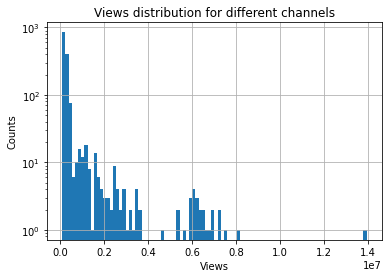

In [81]:
plt.grid()
plt.title('Views distribution for different channels')
plt.xlabel('Views')
plt.ylabel('Counts')
plt.yscale('log')
plt.hist(channel_title_dep_median_df['views'], bins=96)

print('Average views:', channel_title_dep_median_df['views'].mean())
print('Median views:', channel_title_dep_median_df['views'].median())
print('Standard deviation of views [count]:', channel_title_dep_median_df['views'].std())
print('Standard deviation of views     [%]:', channel_title_dep_median_df['views'].std()*100 / channel_title_dep_median_df['views'].mean())

#**10. Ïú†Ï†Ñ ÏïåÍ≥†Î¶¨Ï¶ò - ÏµúÏ†Å ÌîºÏ≥ê ÌÉêÏÉâ: Top YouTuber**

In [82]:
# 0: 'likes'
# 1: 'dislikes'
# 2: 'comment_count'
# 3: 'elapsed_day'
# 4: 'number_of_tag'
# 5: 'positive_ratio'
# 6: 'description_length'
# 7: 'title_length'
# 8: 'r_avg'
# 9: 'g_avg'
# 10: 'b_avg'
# 11: 'channel_title_mean_enc'
# 12: 'category_id_mean_enc'

varbound = np.array([[df_rgb2['likes'].min(), df_rgb2['likes'].max()*2],
                     [df_rgb2['dislikes'].min() + 1, df_rgb2['dislikes'].max()*2],
                     [df_rgb2['comment_count'].min() + 1, df_rgb2['comment_count'].max()*2],
                     [df_rgb2['elapsed_day'].min(), df_rgb2['elapsed_day'].max()],
                     [df_rgb2['number_of_tag'].min(), df_rgb2['number_of_tag'].max()],
                     [df_rgb2['description_length'].min(), df_rgb2['description_length'].max()],
                     [df_rgb2['title_length'].min(), df_rgb2['title_length'].max()*2],
                     [df_rgb2['r_avg'].min(), df_rgb2['r_avg'].max()],
                     [df_rgb2['g_avg'].min(), df_rgb2['g_avg'].max()],
                     [df_rgb2['b_avg'].min(), df_rgb2['b_avg'].max()],
                     [0, len(mean_encode_channel) - 1],
                     # [0, len(mean_encode_category) - 1]],
                     [2, 2]])

In [83]:
def object_function_top(x_input, target_model=voting_clf):
    input_converted = input_conversion(x_input)
    input_converted = np.array(input_converted).reshape(1, -1)

    input_scaled = scaler.transform(input_converted)
    prediction = target_model.predict(input_scaled)        

    target = 70000000
    print('Predicted views:', int(prediction), 'Difference from target:', int(target - prediction))

    # return abs(int(prediction) - target)
    return math.log(abs(target - int(prediction))) 

In [84]:
algorithm_param = {'max_num_iteration': 300,
                   'population_size': 100,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

Streaming output truncated to the last 5000 lines.
Predicted views: 51655295 Difference from target: 18344704
Predicted views: 46415046 Difference from target: 23584953
Predicted views: 51250498 Difference from target: 18749501
Predicted views: 52177433 Difference from target: 17822566
Predicted views: 52876001 Difference from target: 17123998
Predicted views: 52372084 Difference from target: 17627915
Predicted views: 48613026 Difference from target: 21386973
Predicted views: 52047448 Difference from target: 17952551
Predicted views: 52372709 Difference from target: 17627290
Predicted views: 47164023 Difference from target: 22835976
Predicted views: 52959204 Difference from target: 17040795
Predicted views: 52582492 Difference from target: 17417507
Predicted views: 52226574 Difference from target: 17773425
Predicted views: 52727837 Difference from target: 17272162
Predicted views: 52995686 Difference from target: 17004313
Predicted views: 52131801 Difference from target: 17868198
Predi

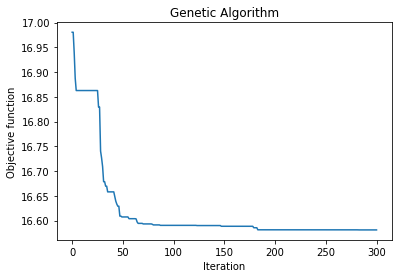

In [85]:
model_ga_top = geneticalgorithm(function=object_function_top,
                                dimension=12,
                                variable_type='int',
                                variable_boundaries=varbound,
                                algorithm_parameters=algorithm_param)

model_ga_top.run()

In [86]:
convergence_top = model_ga_top.report
solution_top = model_ga_top.output_dict

print(convergence_top)
print(solution_top)

[16.980434526018577, 16.980434526018577, 16.93940035448539, 16.88729841655642, 16.862636983319536, 16.862636983319536, 16.862636983319536, 16.862636983319536, 16.862636983319536, 16.862636983319536, 16.862636983319536, 16.862636983319536, 16.862636983319536, 16.862636983319536, 16.862636983319536, 16.862636983319536, 16.862636983319536, 16.862636983319536, 16.862636983319536, 16.862636983319536, 16.862636983319536, 16.862636983319536, 16.862636983319536, 16.862636983319536, 16.862636983319536, 16.862636983319536, 16.829255180751993, 16.829255180751993, 16.740305481471914, 16.72629918802081, 16.70886696846138, 16.67840605473515, 16.67840605473515, 16.66939408828799, 16.66939408828799, 16.65788516217506, 16.65788516217506, 16.65788516217506, 16.65788516217506, 16.65788516217506, 16.65788516217506, 16.65788516217506, 16.648871361736006, 16.639105974150624, 16.633153247282916, 16.62894745438162, 16.62894745438162, 16.608911263125492, 16.608911263125492, 16.60720153975097, 16.60720153975097

In [87]:
ga_solution = input_conversion(solution_top['variable'])
ga_solution = np.array(ga_solution).reshape(1, -1)

ga_solution_df = pd.DataFrame(ga_solution, columns=features)
ga_solution_df

likes   dislikes  comment_count  elapsed_day  number_of_tag  \
0  5025594.0  1040755.0       700412.0         57.0           44.0   

   positive_ratio  description_length  title_length  r_avg  g_avg  b_avg  \
0        4.828796              1527.0          89.0  116.0  106.0  126.0   

   channel_title_mean_enc  category_id_mean_enc  
0              52611730.0          1.563406e+06

In [88]:
channel_title = mean_encode_channel[mean_encode_channel.isin(ga_solution_df['channel_title_mean_enc'])].index[0]
ga_solution_df['channel_title_mean_enc'] = channel_title
ga_solution_df = ga_solution_df.rename(columns={'channel_title_mean_enc': 'channel_title'})

category_id = mean_encode_category[mean_encode_category.isin(ga_solution_df['category_id_mean_enc'])].index[0]
ga_solution_df['category_id_mean_enc'] = category_id
ga_solution_df = ga_solution_df.rename(columns={'category_id_mean_enc': 'category_id'})
ga_solution_df

likes   dislikes  comment_count  elapsed_day  number_of_tag  \
0  5025594.0  1040755.0       700412.0         57.0           44.0   

   positive_ratio  description_length  title_length  r_avg  g_avg  b_avg  \
0        4.828796              1527.0          89.0  116.0  106.0  126.0   

       channel_title  category_id  
0  YouTube Spotlight           10

In [89]:
ga_solution_df['category_id'] = category_id_code[str(ga_solution_df['category_id'][0])]
ga_solution_df = ga_solution_df.rename(columns={'category_id': 'category'})
ga_solution_df

likes   dislikes  comment_count  elapsed_day  number_of_tag  \
0  5025594.0  1040755.0       700412.0         57.0           44.0   

   positive_ratio  description_length  title_length  r_avg  g_avg  b_avg  \
0        4.828796              1527.0          89.0  116.0  106.0  126.0   

       channel_title category  
0  YouTube Spotlight    Music

In [90]:
prediction = voting_clf.predict(scaler.transform(ga_solution))
ga_solution_df['Views'] = int(prediction[0])
ga_solution_top = ga_solution_df
ga_solution_top

likes   dislikes  comment_count  elapsed_day  number_of_tag  \
0  5025594.0  1040755.0       700412.0         57.0           44.0   

   positive_ratio  description_length  title_length  r_avg  g_avg  b_avg  \
0        4.828796              1527.0          89.0  116.0  106.0  126.0   

       channel_title category     Views  
0  YouTube Spotlight    Music  54113102

#**11. Í≤∞Í≥º Í≤ÄÌÜ† Î∞è Î∂ÑÏÑù: Top YouTuber**

In [91]:
df_rgb2.describe()

category_id         views         likes       dislikes  comment_count  \
count  6660.000000  6.660000e+03  6.660000e+03    6660.000000    6660.000000   
mean     21.178228  3.679328e+05  1.517848e+04     516.760210    2351.420420   
std       6.762678  1.650656e+06  1.029162e+05   11250.755719   18606.078576   
min       1.000000  2.623000e+03  2.000000e+00       0.000000       0.000000   
25%      20.000000  4.410425e+04  6.875000e+02      20.000000     152.000000   
50%      24.000000  9.867750e+04  2.041000e+03      54.000000     429.000000   
75%      25.000000  2.331160e+05  4.763500e+03     142.000000    1085.000000   
max      43.000000  6.279639e+07  4.470923e+06  884965.000000  905925.000000   

             r_avg        g_avg        b_avg  elapsed_day  \
count  6660.000000  6660.000000  6660.000000  6660.000000   
mean     94.594595    87.217718    85.692793     2.535285   
std      31.142526    29.403190    29.615434    12.361518   
min       6.000000     6.000000     4.000000     1.000000   
25%      74.000000    68.000000    66.000000     2.000000   
50%      95.000000    87.000000    84.000000     2.000000   
75%     116.000000   107.000000   105.000000     2.000000   
max     201.000000   188.000000   188.000000   706.000000   

       total_number_of_sign  number_of_tag  positive_ratio  sign_per_day  \
count          6.660000e+03    6660.000000     6660.000000  6.660000e+03   
mean           1.569524e+04      21.761411      107.374173  7.203854e+03   
std            1.078618e+05      18.008257      416.542044  4.669991e+04   
min            2.000000e+00       1.000000        0.161180  3.703704e-02   
25%            7.447500e+02       8.000000       14.277114  3.350000e+02   
50%            2.164000e+03      17.000000       35.345000  1.007500e+03   
75%            4.919000e+03      30.000000       79.090295  2.398500e+03   
max            4.589976e+06     126.000000     5325.750000  1.529992e+06   

       positive_ratio_per_day  comment_per_day  total_sign_comment_ratio  \
count             6660.000000      6660.000000               6660.000000   
mean                50.651204      1075.410628                  9.752234   
std                194.373689      7482.807020                 47.784162   
min                  0.012151         0.000000                  0.185734   
25%                  6.419956        67.000000                  2.800669   
50%                 16.603958       199.166667                  5.175674   
75%                 37.909452       518.000000                  9.104006   
max               2662.875000    301975.000000               1071.000000   

       description_length  title_length  channel_title_mean_enc  \
count         6660.000000   6660.000000            6.660000e+03   
mean           431.890390     43.293393            3.679328e+05   
std            533.755556     19.589321            1.351592e+06   
min              1.000000      4.000000            2.623000e+03   
25%            122.000000     28.000000            5.967391e+04   
50%            263.500000     41.000000            1.216400e+05   
75%            534.000000     55.000000            2.423650e+05   
max           5235.000000    100.000000            5.261173e+07   

       category_id_mean_enc  
count          6.660000e+03  
mean           3.679328e+05  
std            3.695106e+05  
min            2.332710e+04  
25%            1.296611e+05  
50%            2.769006e+05  
75%            4.098237e+05  
max            1.678646e+06

In [92]:
inf_input = copy.deepcopy(model_ga_top)

comment_count_dep_top = []

for i in tqdm.tqdm(range(df_rgb2['comment_count'].min(), df_rgb2['comment_count'].max(), 1000)):    
    inf_input.output_dict['variable'][2] = i
    input_converted = input_conversion(inf_input.output_dict['variable'])
    input_converted = np.array(input_converted).reshape(1, -1)

    input_scaled = scaler.transform(input_converted)
    prediction = voting_clf.predict(input_scaled)    
    comment_count_dep_top.append([i, int(prediction)])

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 906/906 [01:40<00:00,  9.02it/s]


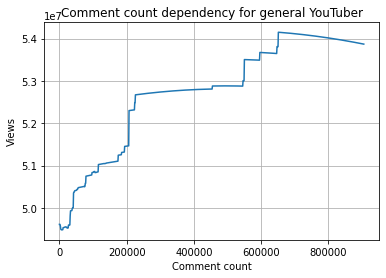

In [93]:
comment_count_dep_top_df = pd.DataFrame(comment_count_dep_top, columns=['comment_count', 'views'])

plt.title('Comment count dependency for general YouTuber')
plt.xlabel('Comment count')
plt.ylabel('Views')
plt.grid()
plt.plot(comment_count_dep_top_df['comment_count'], comment_count_dep_top_df['views'])

In [94]:
inf_input = copy.deepcopy(model_ga_top)

positive_ratio_dep_top = []

total_sign = inf_input.output_dict['variable'][0] + inf_input.output_dict['variable'][1]
calculation_plot = 500
step = total_sign / calculation_plot

for i in tqdm.tqdm(np.arange(1, total_sign, step)):    
    inf_input.output_dict['variable'][0] = int(i)
    inf_input.output_dict['variable'][1] = total_sign - int(i)
    ratio = inf_input.output_dict['variable'][0] / inf_input.output_dict['variable'][1]

    input_converted = input_conversion(inf_input.output_dict['variable'])
    input_converted = np.array(input_converted).reshape(1, -1)

    input_scaled = scaler.transform(input_converted)
    prediction = voting_clf.predict(input_scaled)   
    positive_ratio_dep_top.append([ratio, int(prediction)])

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:55<00:00,  9.04it/s]


<BarContainer object of 500 artists>

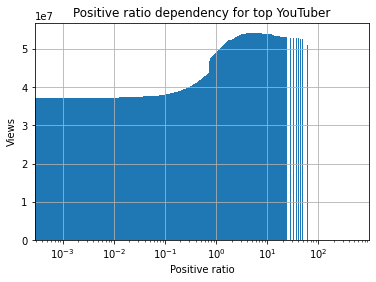

In [95]:
positive_ratio_dep_top_df = pd.DataFrame(positive_ratio_dep_top, columns=['positive_ratio', 'views'])

plt.title('Positive ratio dependency for top YouTuber')
plt.xlabel('Positive ratio')
plt.ylabel('Views')
plt.xscale('log')
plt.grid()
plt.bar(positive_ratio_dep_top_df['positive_ratio'], positive_ratio_dep_top_df['views'])

In [96]:
inf_input = copy.deepcopy(model_ga_top)

number_of_tag_dep_top = []

for i in tqdm.tqdm(range(df_rgb2['number_of_tag'].min(), df_rgb2['number_of_tag'].max())):    
    inf_input.output_dict['variable'][4] = i
    input_converted = input_conversion(inf_input.output_dict['variable'])
    input_converted = np.array(input_converted).reshape(1, -1)

    input_scaled = scaler.transform(input_converted)
    prediction = voting_clf.predict(input_scaled)   
    number_of_tag_dep_top.append([i, int(prediction)])

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 125/125 [00:13<00:00,  9.00it/s]


In [97]:
number_of_tag_dep_top_df = pd.DataFrame(number_of_tag_dep_top, columns=['number_of_tag', 'views'])

plt.title('Number of tag dependency for top YouTuber')
plt.xlabel('The number of tag')
plt.ylabel('Views')
plt.grid()
plt.bar(number_of_tag_dep_top_df['number_of_tag'], number_of_tag_dep_top_df['views'])

<BarContainer object of 125 artists>

In [98]:
inf_input = copy.deepcopy(model_ga_top)

random_image_dep_top = []

for i in tqdm.tqdm(range(2000)):    
    inf_input.output_dict['variable'][7] = randint(df_rgb2['r_avg'].min(), df_rgb2['r_avg'].max())
    inf_input.output_dict['variable'][8] = randint(df_rgb2['g_avg'].min(), df_rgb2['g_avg'].max())
    inf_input.output_dict['variable'][9] = randint(df_rgb2['b_avg'].min(), df_rgb2['b_avg'].max())
    input_converted = input_conversion(inf_input.output_dict['variable'])
    input_converted = np.array(input_converted).reshape(1, -1)

    input_scaled = scaler.transform(input_converted)
    prediction = voting_clf.predict(input_scaled)    
    random_image_dep_top.append([i, int(prediction)])

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2000/2000 [03:43<00:00,  8.94it/s]


In [99]:
random_image_dep_top_df = pd.DataFrame(random_image_dep_top, columns=['Random_image', 'Views'])

plt.grid()
plt.title('Thumbnail image dependency')
plt.plot(random_image_dep_top_df['Random_image'], random_image_dep_top_df['Views'])

Average views: 53292985.6115
Median views: 53369109.0
Standard deviation of views [count]: 519110.35775766615
Standard deviation of views     [%]: 0.9740688231316659


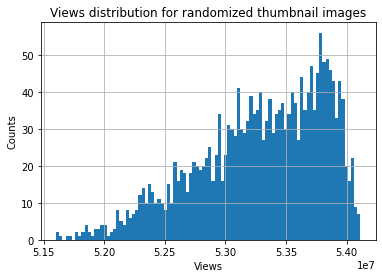

In [100]:
plt.grid()
plt.title('Views distribution for randomized thumbnail images')
plt.xlabel('Views')
plt.ylabel('Counts')
plt.hist(random_image_dep_top_df['Views'], bins=96)

print('Average views:', random_image_dep_top_df['Views'].mean())
print('Median views:', random_image_dep_top_df['Views'].median())
print('Standard deviation of views [count]:', random_image_dep_top_df['Views'].std())
print('Standard deviation of views     [%]:', random_image_dep_top_df['Views'].std()*100 / random_image_dep_top_df['Views'].mean())

In [101]:
inf_input = copy.deepcopy(model_ga_top)

channel_title_dep_top = []

for i in tqdm.tqdm(range(len(mean_encode_channel))):
    inf_input.output_dict['variable'][10] = i 
    
    input_converted = input_conversion(inf_input.output_dict['variable'])
    input_converted = np.array(input_converted).reshape(1, -1)

    input_scaled = scaler.transform(input_converted)
    prediction = voting_clf.predict(input_scaled)    
    channel_title_dep_top.append([mean_encode_channel.index[i], int(prediction)])

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1493/1493 [02:44<00:00,  9.05it/s]


In [102]:
channel_title_dep_top_df = pd.DataFrame(channel_title_dep_top, columns=['channel_title', 'views'])

plt.title('Channel dependency for top YouTuber')
plt.xlabel('Channel name')
plt.ylabel('Views')
plt.yscale('log')
plt.grid()
plt.bar(range(len(channel_title_dep_top_df['channel_title'])), channel_title_dep_top_df['views'])

<BarContainer object of 1493 artists>

In [103]:
channel_title_dep_top_df.sort_values(by='views', ascending=False).head(10)

channel_title     views
628            YouTube Spotlight  54113102
179                 FoxStarHindi  49823181
52              ArianaGrandeVevo  49387696
681                      ibighit  49280591
56                   AsapSCIENCE  49253439
552              TaylorSwiftVEVO  49164806
123          ChildishGambinoVEVO  49118949
160                 Dude Perfect  49104069
506  Sony Pictures Entertainment  49038333
366         Marvel Entertainment  49003306

In [104]:
plt.grid()
plt.title('Views distribution for different channels')
plt.xlabel('Views')
plt.ylabel('Counts')
plt.yscale('log')
plt.hist(channel_title_dep_top_df['views'], bins=96)

print('Average views:', channel_title_dep_top_df['views'].mean())
print('Median views:', channel_title_dep_top_df['views'].median())
print('Standard deviation of views [count]:', channel_title_dep_top_df['views'].std())
print('Standard deviation of views     [%]:', channel_title_dep_top_df['views'].std()*100 / channel_title_dep_top_df['views'].mean())

Average views: 34249662.72873409
Median views: 33847312.0
Standard deviation of views [count]: 2079843.215115721
Standard deviation of views     [%]: 6.072594733526577


In [105]:
df_rgb2.sort_values(by='views', ascending=False).head(10)

video_id trending_date  \
5659  7C2z4GqqS5E    2018-05-20   
821   FlsCjmMhFmw    2017-12-08   
4432  i0p1bmr0EmE    2018-04-14   
560   6ZfuNTqbHE8    2017-11-30   
4803  u9Mv98Gr5pY    2018-04-25   
3702  QwievZ1Tx-8    2018-03-17   
4840  rRr1qiJRsXk    2018-04-25   
854   vn9mMeWcgoM    2017-12-09   
2298  VRJmcxCrAOA    2018-01-25   
77    n1WpP7iowLc    2017-11-14   

                                                  title  \
5659                BTS (Î∞©ÌÉÑÏÜåÎÖÑÎã®) 'FAKE LOVE' Official MV   
821   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
4432                            TWICE What is Love? M/V   
560   Marvel Studios' Avengers: Infinity War Officia...   
4803                      VENOM - Official Trailer (HD)   
3702  Marvel Studios' Avengers: Infinity War - Offic...   
4840  Sanju | Official Teaser | Ranbir Kapoor | Rajk...   
854   Jurassic World: Fallen Kingdom - Official Trai...   
2298             Real Life Trick Shots 2 | Dude Perfect   
77           Eminem - Walk On Water (Audio) ft. Beyonc√©   

                    channel_title  category_id              publish_time  \
5659                      ibighit           10  2018-05-18T09:00:02.000Z   
821             YouTube Spotlight           24  2017-12-06T17:58:51.000Z   
4432             jypentertainment           10  2018-04-09T08:59:51.000Z   
560          Marvel Entertainment           24  2017-11-29T13:26:24.000Z   
4803  Sony Pictures Entertainment           24  2018-04-24T03:45:03.000Z   
3702         Marvel Entertainment           24  2018-03-16T13:02:41.000Z   
4840                 FoxStarHindi           24  2018-04-24T07:58:08.000Z   
854            Universal Pictures           24  2017-12-08T01:44:25.000Z   
2298                 Dude Perfect           17  2018-01-22T22:55:24.000Z   
77                     EminemVEVO           10  2017-11-10T17:00:03.000Z   

                                                   tags     views    likes  \
5659  BIGHIT|"ÎπÖÌûàÌä∏"|"Î∞©ÌÉÑÏÜåÎÖÑÎã®"|"BTS"|"BANGTAN"|"Î∞©ÌÉÑ"|"FAK...  62796390  4470923   
821   Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...  52611730  1891832   
4432  TWICE What is Love|"TWICE What is Love?"|"TWIC...  38840787  1111599   
560   marvel|"comics"|"comic books"|"nerdy"|"geeky"|...  37736281  1735938   
4803  Venom|"Venom Movie"|"Venom (2018)"|"Marvel"|"M...  27973210   850377   
3702  marvel|"comics"|"comic books"|"nerd"|"geek"|"s...  19716689   975760   
4840  Sanju Teaser|"Official Teaser"|"Sanju Official...  18639195   511785   
854   Jurassic World|"Fallen Kingdom"|"Jurassic Park...  18184886   399208   
2298  dude perfect|"dude perfect stereotypes"|"dude ...  17228602   784294   
77    Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787426   

      dislikes  comment_count                                  thumbnail_link  \
5659    119053         905925  https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg   
821     884965         702790  https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg   
4432     96407         206639  https://i.ytimg.com/vi/i0p1bmr0EmE/default.jpg   
560      21972         241242  https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg   
4803     26543          96767  https://i.ytimg.com/vi/u9Mv98Gr5pY/default.jpg   
3702      9120         127045  https://i.ytimg.com/vi/QwievZ1Tx-8/default.jpg   
4840     15607          32435  https://i.ytimg.com/vi/rRr1qiJRsXk/default.jpg   
854      17473          58902  https://i.ytimg.com/vi/vn9mMeWcgoM/default.jpg   
2298      9287          41999  https://i.ytimg.com/vi/VRJmcxCrAOA/default.jpg   
77       43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   

      comments_disabled  ratings_disabled  video_error_or_removed  \
5659              False             False                   False   
821               False             False                   False   
4432              False             False                   False   
560               False             False                   False   
4803     